# Start

## importing

importing the data sets directly from github along side multiple handy imports i will to use in the future.

In [1009]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import requests
import io
import re
import pandas as pd 
import numpy as np 
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

In [1010]:
url = 'https://raw.githubusercontent.com/nikodemadamski/FYP/main/celebrities%20dataset.csv'
url2 = 'https://raw.githubusercontent.com/nikodemadamski/FYP/main/tiktok_1(1).csv'
url3 = 'https://raw.githubusercontent.com/nikodemadamski/FYP/main/insta_upload.csv'
url4 = 'https://raw.githubusercontent.com/nikodemadamski/FYP/main/tw_upload.csv'
url5 = 'https://raw.githubusercontent.com/nikodemadamski/FYP/main/yt_upload.csv'
download = requests.get(url).content
download2 = requests.get(url2).content
download3 = requests.get(url3).content
download4 = requests.get(url4).content
download5 = requests.get(url5).content


df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df2 = pd.read_csv(io.StringIO(download2.decode('utf-8')))
insta_upload = pd.read_csv(io.StringIO(download3.decode('utf-8')))
tw_upload = pd.read_csv(io.StringIO(download4.decode('utf-8')))
yt_upload = pd.read_csv(io.StringIO(download5.decode('utf-8')))

### testing

In [1011]:
df = df.dropna()
df2 = df2.dropna()

In [1012]:
df

,Month,Charli D'Amelio web,Charli D'Amelio yt,Charli D'Amelio image,Charli D'Amelio news,Charli D'Amelio Total,Jules LeBlanc web,Jules LeBlanc yt,Jules LeBlanc image,Jules LeBlanc news,...,Cole Sprouse web,Cole Sprouse yt,Cole Sprouse image,Cole Sprouse news,Cole Sprouse Total,Joe Biden web,Joe Biden yt,Joe Biden image,Joe Biden news,Joe Biden Total
0,2016-01,5.0,5.0,3,1.0,3.50,8.0,3.0,3.0,7.0,...,9.0,4.0,26.0,3.0,10.50,<1,1,1,1,1
1,2016-02,4.0,5.0,2,1.0,3.00,9.0,3.0,7.0,0.0,...,11.0,6.0,26.0,3.0,11.50,1,1,1,1,1
2,2016-03,4.0,4.0,2,0.0,2.50,7.0,5.0,8.0,6.0,...,11.0,7.0,25.0,4.0,11.75,1,1,1,1,1
3,2016-04,4.0,4.0,1,1.0,2.50,9.0,4.0,9.0,0.0,...,9.0,6.0,21.0,3.0,9.75,<1,1,1,1,1
4,2016-05,3.0,4.0,1,1.0,2.25,11.0,5.0,11.0,7.0,...,8.0,6.0,18.0,5.0,9.25,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-08,41.0,25.0,48,16.0,32.50,28.0,6.0,15.0,0.0,...,30.0,18.0,33.0,20.0,25.25,10,19,10,21,15
68,2021-09,43.0,28.0,41,8.0,30.00,18.0,5.0,23.0,0.0,...,19.0,13.0,23.0,16.0,17.75,9,16,11,17,13.25
69,2021-10,29.0,17.0,32,9.0,21.75,18.0,4.0,27.0,0.0,...,16.0,12.0,22.0,14.0,16.00,6,11,10,15,10.5
70,2021-11,29.0,16.0,34,13.0,23.00,22.0,5.0,26.0,0.0,...,16.0,11.0,22.0,12.0,15.25,8,13,11,15,11.75


In [1013]:
df2

,Name,Following,Followers,Likes,Views,V_Date,V_Likes,V_Comments
0,charlidamelio,1267,136.7M,10.6B,1.4M,3h ago,342.1K,19K
1,charlidamelio,1267,136.7M,10.6B,4.4M,2d ago,799.3K,55.6K
2,charlidamelio,1267,136.7M,10.6B,27M,4d ago,5.8M,83.1K
3,charlidamelio,1267,136.7M,10.6B,9.8M,4d ago,1.5M,35.4K
4,charlidamelio,1267,136.7M,10.6B,6.5M,4d ago,828.5K,31.4K
...,...,...,...,...,...,...,...,...
18782,gavinmagnus,4020,5.1M,156.8M,2.9M,2021-12-7,317.5K,13.2K
18783,gavinmagnus,4020,5.1M,156.8M,4.8M,2021-12-3,428.6K,6948
18784,gavinmagnus,4020,5.1M,156.8M,9.4M,2021-11-28,1.1M,37.5K
18785,gavinmagnus,4020,5.1M,156.8M,1.9M,2021-11-26,110.7K,3914


In [1014]:
df2.dtypes

Name          object
Following      int64
Followers     object
Likes         object
Views         object
V_Date        object
V_Likes       object
V_Comments    object
dtype: object

## EDA1

I have to now change data set 2 , this will be in 2 ways, 1 will eliminate all data with V_date from after 2021, Second will average the videos from daily videos to monthly videos averages to be able to correlate with the data from the first data set

### 1

 eliminating all data after 2021
 [Reference](https://www.statology.org/pandas-sum-column-with-condition/)

In [1015]:
df2 = df2[df2["V_Date"].str.contains("ago")==False]

In [1016]:
df2 = df2[df2['V_Date'].between('2016', '2022')]

In [1017]:
df2

,Name,Following,Followers,Likes,Views,V_Date,V_Likes,V_Comments
70,charlidamelio,1267,136.7M,10.6B,16.8M,2021-12-31,2.1M,43.6K
71,charlidamelio,1267,136.7M,10.6B,15.2M,2021-12-29,1M,24.4K
72,charlidamelio,1267,136.7M,10.6B,12M,2021-12-28,693.3K,15.8K
73,charlidamelio,1267,136.7M,10.6B,13.4M,2021-12-28,859.3K,22.2K
74,charlidamelio,1267,136.7M,10.6B,21.4M,2021-12-25,2.4M,38.4K
...,...,...,...,...,...,...,...,...
18782,gavinmagnus,4020,5.1M,156.8M,2.9M,2021-12-7,317.5K,13.2K
18783,gavinmagnus,4020,5.1M,156.8M,4.8M,2021-12-3,428.6K,6948
18784,gavinmagnus,4020,5.1M,156.8M,9.4M,2021-11-28,1.1M,37.5K
18785,gavinmagnus,4020,5.1M,156.8M,1.9M,2021-11-26,110.7K,3914


### 1.5
 Changing B into Billions, M into million and K into Thousands
 And Changing notation on values that are too large e.g 10.6B from Float to int as none of the large values have an exact amount so they are rounded to the nearest Billion,Million or thousand
  [Reference](https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe)
  [Reference2](https://stackoverflow.com/questions/658763/how-to-suppress-scientific-notation-when-printing-float-values)

In [1018]:
df2.Views = (df2.Views.replace(r'[KMB]+$', '', regex=True).astype(float) * \
                   df2.Views.str.extract(r'[\d\.]+([KMB]+)', expand=False)
                   .fillna(1)
                   .replace(['K','M','B'], [10**3, 10**6,10**9]).astype(int))

In [1019]:
df2.V_Likes = (df2.V_Likes.replace(r'[KMB]+$', '', regex=True).astype(float) * \
                   df2.V_Likes.str.extract(r'[\d\.]+([KMB]+)', expand=False)
                   .fillna(1)
                   .replace(['K','M','B'], [10**3, 10**6,10**9]).astype(int))

In [1020]:
df2.V_Comments = (df2.V_Comments.replace(r'[KMB]+$', '', regex=True).astype(float) * \
                   df2.V_Comments.str.extract(r'[\d\.]+([KMB]+)', expand=False)
                   .fillna(1)
                   .replace(['K','M','B'], [10**3, 10**6,10**9]).astype(int))

In [1021]:
df2.Likes = (df2.Likes.replace(r'[KMB]+$', '', regex=True).astype(float) * \
                   df2.Likes.str.extract(r'[\d\.]+([KMB]+)', expand=False)
                   .fillna(1)
                   .replace(['K','M','B'], [10**3, 10**6,10**9]).astype(int))

In [1022]:
df2.Followers = (df2.Followers.replace(r'[KMB]+$', '', regex=True).astype(float) * \
                   df2.Followers.str.extract(r'[\d\.]+([KMB]+)', expand=False)
                   .fillna(1)
                   .replace(['K','M','B'], [10**3, 10**6,10**9]).astype(int))

In [1023]:
df2.head()

,Name,Following,Followers,Likes,Views,V_Date,V_Likes,V_Comments
70,charlidamelio,1267,136700000.0,1.060000e+10,16800000.0,2021-12-31,2100000.0,43600.0
71,charlidamelio,1267,136700000.0,1.060000e+10,15200000.0,2021-12-29,1000000.0,24400.0
72,charlidamelio,1267,136700000.0,1.060000e+10,12000000.0,2021-12-28,693300.0,15800.0
73,charlidamelio,1267,136700000.0,1.060000e+10,13400000.0,2021-12-28,859300.0,22200.0
74,charlidamelio,1267,136700000.0,1.060000e+10,21400000.0,2021-12-25,2400000.0,38400.0


In [1024]:
# repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', }
# df2['Views'].replace(repl_dict, regex=True).map(pd.eval)

In [1025]:
tList = ['Following','Followers','Likes','Views','V_Likes','V_Comments']
for x in tList:
  df2[x]=df2[x].astype(int)

In [1026]:
df2.dtypes

Name          object
Following      int64
Followers      int64
Likes          int64
Views          int64
V_Date        object
V_Likes        int64
V_Comments     int64
dtype: object

In [1027]:
df2

,Name,Following,Followers,Likes,Views,V_Date,V_Likes,V_Comments
70,charlidamelio,1267,136700000,10600000000,16800000,2021-12-31,2100000,43600
71,charlidamelio,1267,136700000,10600000000,15200000,2021-12-29,1000000,24400
72,charlidamelio,1267,136700000,10600000000,12000000,2021-12-28,693300,15800
73,charlidamelio,1267,136700000,10600000000,13400000,2021-12-28,859300,22200
74,charlidamelio,1267,136700000,10600000000,21400000,2021-12-25,2400000,38400
...,...,...,...,...,...,...,...,...
18782,gavinmagnus,4020,5100000,156800000,2900000,2021-12-7,317500,13200
18783,gavinmagnus,4020,5100000,156800000,4800000,2021-12-3,428600,6948
18784,gavinmagnus,4020,5100000,156800000,9400000,2021-11-28,1100000,37500
18785,gavinmagnus,4020,5100000,156800000,1900000,2021-11-26,110700,3914


### 2

averaging into monthly videos

first lets change the V_date from a string into a valid time

In [1028]:
df2["V_Date"] = pd.to_datetime(df2["V_Date"])

next lets try to group by time
  [Reference](https://stackoverflow.com/questions/65471540/get-monthly-average-in-pandas)

In [1029]:
df8 = df2.groupby(['Name',pd.PeriodIndex(df2['V_Date'],
                                          freq="M")]).count()

In [1030]:
df8

Following  Followers  Likes  Views  V_Date  V_Likes  \
Name          V_Date                                                         
addisonre     2019-07         19         19     19     19      19       19   
              2019-08         16         16     16     16      16       16   
              2019-09         24         24     24     24      24       24   
              2019-10         42         42     42     42      42       42   
              2019-11         58         58     58     58      58       58   
...                          ...        ...    ...    ...     ...      ...   
taylorswift   2021-08          2          2      2      2       2        2   
              2021-09          9          9      9      9       9        9   
              2021-10          2          2      2      2       2        2   
              2021-11         11         11     11     11      11       11   
              2021-12          1          1      1      1       1        1   

                       V_Comments  
Name          V_Date               
addisonre     2019-07          19  
              2019-08          16  
              2019-09          24  
              2019-10          42  
              2019-11          58  
...                           ...  
taylorswift   2021-08           2  
              2021-09           9  
              2021-10           2  
              2021-11          11  
              2021-12           1  

[609 rows x 7 columns]

In [1031]:
df20 = df2.groupby(['Name',pd.PeriodIndex(df2['V_Date'],
                                          freq="M")]).sum()

In [1032]:
df20

Following   Followers         Likes      Views  \
Name          V_Date                                                    
addisonre     2019-07      44403  1647300000  106400000000  160199998   
              2019-08      37392  1387200000   89600000000   90600000   
              2019-09      56088  2080800000  134400000000  119700000   
              2019-10      98154  3641400000  235200000000  215999999   
              2019-11     135546  5028600000  324800000000  742099999   
...                          ...         ...           ...        ...   
taylorswift   2021-08          0    22000000     201000000   40200000   
              2021-09          0    99000000     904500000  237200000   
              2021-10          0    22000000     201000000   24200000   
              2021-11          0   121000000    1105500000  277100000   
              2021-12          0    11000000     100500000    8000000   

                        V_Likes  V_Comments  
Name          V_Date                         
addisonre     2019-07  21145500      416674  
              2019-08  12498900       99756  
              2019-09  15726600      145096  
              2019-10  29759300      186774  
              2019-11  88277900      399764  
...                         ...         ...  
taylorswift   2021-08   5500000      293500  
              2021-09  38200000      541600  
              2021-10   4200000       71300  
              2021-11  50700000      622700  
              2021-12   1900000       32600  

[609 rows x 6 columns]

In [1033]:
df9 = df8['Following'].copy()

In [1034]:
df9=df9.reset_index()

In [1035]:
df9.rename(columns = {'Name':'Name', 'V_Date':'date',
                              'Following':'TikTok_uploads'}, inplace = True)

In [1036]:
df9

,Name,date,TikTok_uploads
0,addisonre,2019-07,19
1,addisonre,2019-08,16
2,addisonre,2019-09,24
3,addisonre,2019-10,42
4,addisonre,2019-11,58
...,...,...,...
604,taylorswift,2021-08,2
605,taylorswift,2021-09,9
606,taylorswift,2021-10,2
607,taylorswift,2021-11,11


In [1037]:
df3 = df2.groupby(['Name',pd.PeriodIndex(df2['V_Date'],
                                          freq="M")]).mean()

In [1038]:
tList = ['Following','Followers','Likes','Views','V_Likes','V_Comments']
for x in tList:
  df3[x]=df3[x].astype(int)

In [1039]:
df3.dtypes

Following     int64
Followers     int64
Likes         int64
Views         int64
V_Likes       int64
V_Comments    int64
dtype: object

In [1040]:
tList = ['Views','V_Likes','V_Comments']
for x in tList:
  df3[x]=df3[x].astype(int)

In [1041]:
df3

Following  Followers       Likes     Views  V_Likes  \
Name          V_Date                                                         
addisonre     2019-07       2337   86700000  5600000000   8431578  1112921   
              2019-08       2337   86700000  5600000000   5662500   781181   
              2019-09       2337   86700000  5600000000   4987500   655275   
              2019-10       2337   86700000  5600000000   5142857   708554   
              2019-11       2337   86700000  5600000000  12794827  1522032   
...                          ...        ...         ...       ...      ...   
taylorswift   2021-08          0   11000000   100500000  20100000  2750000   
              2021-09          0   11000000   100500000  26355555  4244444   
              2021-10          0   11000000   100500000  12100000  2100000   
              2021-11          0   11000000   100500000  25190909  4609090   
              2021-12          0   11000000   100500000   8000000  1900000   

                       V_Comments  
Name          V_Date               
addisonre     2019-07       21930  
              2019-08        6234  
              2019-09        6045  
              2019-10        4447  
              2019-11        6892  
...                           ...  
taylorswift   2021-08      146750  
              2021-09       60177  
              2021-10       35650  
              2021-11       56609  
              2021-12       32600  

[609 rows x 6 columns]

##EDA2

divide the df into a 2nd dataset which will combine all totals into people who do not have tiktok which will be my control data and people who do have it,
further analysis will continue by dividing the celebrities up into more groups for a more in debth analysis

  [Reference](https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe)


### pt1

List of celebrities who dont have TikTok will be my control group:\
Pewdiepie\
Millie Bobby Brown\
Kim - no post\
Xxxtentacion\
Tom Holland\
Donald Trump\
Beyonce - no post\
Michael Jackson\
Coco Quinn\
Kobe Bryant\
Hayley LeBlanc\
Txunamy\
Zendaya\
Emma Chamberlain\
Cole Sprouse\
Joe Biden

In [1042]:
n_list2=['web','yt','image','news']
df_total = df
for x in n_list2:
  df_total = df_total[df_total.columns.drop(list(df_total.filter(regex=x)))]

In [1043]:
no_tt_cel = ['Pewdiepie',
'Millie Bobby Brown',
'Kim Kardashian',
'XXXTENTACION',
'Tom Holland',
'Donald Trump',
'Beyonce',
'Michael Jackson',
'Coco Quinn',
'Kobe Bryant',
'Hayley LeBlanc',
'Txunamy',
'Zendaya',
'Emma Chamberlain',
'Cole Sprouse',
'Joe Biden']

next lets try to move all the users who dont have tiktok into a seperate column and remove their previous data.

In [1044]:
df_total2 = df_total
for x in no_tt_cel:
  df_total2 = df_total2[df_total2.columns.drop(list(df_total2.filter(regex=x)))]

In [1045]:
df_total2

,Month,Charli D'Amelio Total,Jules Leblanc total,Addison Rae Total,Ariana Grande Total,Justin Bieber Total,Piper Rockelle Total,Jacob Satorious Total,Dixie D'Amelio Total,Lil Huddy Total,...,Baby Ariel Total,Nicki Minaj Total,Josh Riochard Total,Cash Baker Total,Noah Beck Total,Tony Lopez Total,Jake Paul Total,Brent Rivera Total,David Dobrik Total,Gavin Magnus Total
0,2016-01,3.50,5.25,0.500000,63.75,99.25,4.000000,18.50,2.50,0.000000,...,41.75,80.25,8.75,0.00,0.00,1.000000,3.500000,14.50,1.333333,0.00
1,2016-02,3.00,4.75,0.333333,50.50,84.75,3.666667,37.00,1.00,0.000000,...,29.50,68.75,7.25,0.00,0.00,0.500000,2.666667,14.00,2.000000,0.00
2,2016-03,2.50,6.50,1.000000,65.50,76.00,2.750000,38.50,1.00,0.333333,...,37.50,62.25,39.50,0.00,0.00,0.333333,2.333333,15.75,2.750000,0.00
3,2016-04,2.50,5.50,0.000000,61.50,67.75,6.333333,46.75,1.00,0.000000,...,66.50,62.50,40.25,0.00,0.00,0.750000,3.500000,14.25,2.750000,0.00
4,2016-05,2.25,8.50,0.333333,68.00,65.50,4.000000,85.50,1.00,0.000000,...,78.50,58.00,17.50,0.00,0.00,1.500000,3.500000,14.00,2.500000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-08,32.50,12.25,40.500000,31.00,13.75,68.750000,2.50,27.75,20.500000,...,6.50,20.75,20.75,1.75,16.75,6.000000,55.250000,52.25,20.500000,47.75
68,2021-09,30.00,11.50,37.500000,26.75,14.50,82.750000,2.00,30.25,13.000000,...,5.25,29.00,2.50,1.25,12.00,5.000000,11.250000,41.75,19.750000,34.75
69,2021-10,21.75,12.25,22.750000,23.75,11.75,48.750000,2.00,13.50,9.500000,...,4.25,20.00,7.75,2.50,13.00,3.000000,8.750000,43.50,16.000000,28.50
70,2021-11,23.00,13.25,21.250000,23.00,14.00,51.750000,2.25,13.00,8.750000,...,4.50,17.00,6.25,1.75,14.50,3.500000,10.750000,49.75,15.000000,37.50


### pt2

In [1046]:
df_total3 = df_total[['Month','PewDiePie Total', 'Millie Bobby Brown Total','Kim Kardashian total','XXXTENTACION Total','Tom Holland Total','Donald Trump Total','Michael Jackson Total','Beyonce Total','Coco Quinn Total','Kobe Bryant Total', 'Hayley LeBlanc Total','Txunamy Total', 'Zendaya Total', 'Emma Chamberlain Total',
       'Cole Sprouse Total', 'Joe Biden Total']]

In [1047]:
df_Test = df_total3.copy()
df_Test['Control'] = df_Test.median(numeric_only=True, axis=1)
df_Test

,Month,PewDiePie Total,Millie Bobby Brown Total,Kim Kardashian total,XXXTENTACION Total,Tom Holland Total,Donald Trump Total,Michael Jackson Total,Beyonce Total,Coco Quinn Total,Kobe Bryant Total,Hayley LeBlanc Total,Txunamy Total,Zendaya Total,Emma Chamberlain Total,Cole Sprouse Total,Joe Biden Total,Control
0,2016-01,36.00,0.00,49.25,0.00,2.50,15.25,57.25,45.75,0.00,3.500000,3.00,0.75,24.25,0.00,10.50,1,3.50
1,2016-02,34.00,1.00,49.75,0.00,2.00,21.25,55.75,99.00,0.00,4.500000,1.50,4.75,32.25,0.00,11.50,1,4.75
2,2016-03,30.75,1.00,76.75,0.00,7.25,34.25,52.00,47.75,1.50,3.250000,1.50,1.50,27.25,0.00,11.75,1,7.25
3,2016-04,35.75,0.00,50.50,0.00,5.50,21.75,58.75,86.75,0.00,12.750000,1.50,6.50,23.75,0.00,9.75,1,9.75
4,2016-05,39.75,0.00,46.75,0.00,7.50,22.25,53.00,72.50,0.00,3.250000,1.50,3.00,20.50,0.00,9.25,1,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-08,10.00,28.75,17.75,8.50,20.00,5.00,29.50,12.75,40.75,2.750000,24.75,68.50,24.75,27.50,25.25,15,24.75
68,2021-09,8.75,25.00,26.50,8.75,21.25,4.75,30.00,12.25,30.50,2.666667,11.75,58.50,33.25,74.25,17.75,13.25,21.25
69,2021-10,8.50,20.00,26.00,9.25,19.00,4.25,33.75,10.75,21.25,2.666667,8.75,32.25,29.25,39.75,16.00,10.5,19.00
70,2021-11,8.25,20.50,27.00,9.25,29.00,4.00,31.75,10.25,18.75,2.250000,18.50,34.75,28.50,27.00,15.25,11.75,18.75


In [1048]:
Test = df_Test[['Month','Control']]
Test

,Month,Control
0,2016-01,3.50
1,2016-02,4.75
2,2016-03,7.25
3,2016-04,9.75
4,2016-05,7.50
...,...,...
67,2021-08,24.75
68,2021-09,21.25
69,2021-10,19.00
70,2021-11,18.75


Next lets add 2 more columns into test, new tiktok users and old tiktok users

first lets fix name and V_Date as they are not officially column names

### pt3

In [1049]:
df2.groupby(["Name"]).agg({'V_Date' : np.min})

,V_Date
Name,
addisonre,2019-07-09
arianagrande,2020-10-25
avani,2021-06-19
babyariel,2021-10-12
billieeilish,2020-11-12
brentrivera,2021-12-14
brycehall,2019-08-01
cashbaker,2021-12-31
charlidamelio,2019-05-30


In [1050]:
df_total.columns

Index(['Month', 'Charli D'Amelio Total', 'Jules Leblanc total',
       'Addison Rae Total', 'Ariana Grande Total', 'Justin Bieber Total',
       'Piper Rockelle Total', 'Jacob Satorious Total', 'Dixie D'Amelio Total',
       'Lil Huddy Total', 'JoJo Siwa Total', 'Maddie Ziegler Total',
       'Mickenzie Ziegler Total', 'James Charles Total', 'PewDiePie Total',
       'Loren Grey Total', 'Millie Bobby Brown Total', 'Billie Eilish total',
       'Kylie Jenner Total', 'Selena Gomez Total', 'Taylor Swift Total',
       'Kim Kardashian total', 'Cardi B Total', 'Shawn Mendes Total',
       'Bryce Hall Total', 'XXXTENTACION Total', 'Avani Gregg Total',
       'Olicia Rodrigo Total', 'Tom Holland Total', 'Donald Trump Total',
       'Baby Ariel Total', 'Nicki Minaj Total', 'Josh Riochard Total',
       'Beyonce Total', 'Michael Jackson Total', 'Cash Baker Total',
       'Noah Beck Total', 'Tony Lopez Total', 'Jake Paul Total',
       'Brent Rivera Total', 'David Dobrik Total', 'Coco Quinn Tota

In [1051]:
Early = df_total[['Month','JoJo Siwa Total','Jacob Satorious Total','Lil Huddy Total','Loren Grey Total','Selena Gomez Total','Cardi B Total',
                  "Charli D'Amelio Total",'Addison Rae Total', 'Bryce Hall Total','James Charles Total', 'Jules Leblanc total',"Dixie D'Amelio Total",
                  'Mickenzie Ziegler Total','Shawn Mendes Total','Justin Bieber Total',]]
late = df_total[['Month','Ariana Grande Total','Piper Rockelle Total', 'Maddie Ziegler Total','Loren Grey Total','Billie Eilish total','Taylor Swift Total','Avani Gregg Total',
                 'Olicia Rodrigo Total','Baby Ariel Total','Nicki Minaj Total', 'Josh Riochard Total','Cash Baker Total','Brent Rivera Total','Hayley LeBlanc Total', 'Gavin Magnus Total']]

In [1052]:
Early['Early TikToker'] = Early.median(numeric_only=True, axis=1)
late['late TikToker'] = late.median(numeric_only=True, axis=1)

/Users/nikodem/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/nikodem/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1053]:
Test4 = Early[['Month','Early TikToker']]
extracted_col9 = late["late TikToker"]
Test4.insert(2, "late TikToker", extracted_col9)
extracted_col = Test["Control"]
Test4.insert(1, "Control", extracted_col)

In [1054]:
Test4

,Month,Control,Early TikToker,late TikToker
0,2016-01,3.50,4.25,14.50
1,2016-02,4.75,4.75,14.00
2,2016-03,7.25,5.00,22.75
3,2016-04,9.75,4.00,38.75
4,2016-05,7.50,8.50,17.50
...,...,...,...,...
67,2021-08,24.75,20.00,22.50
68,2021-09,21.25,18.00,19.75
69,2021-10,19.00,13.50,15.75
70,2021-11,18.75,16.50,18.50


### pt4

In [1055]:
df3.columns

Index(['Following', 'Followers', 'Likes', 'Views', 'V_Likes', 'V_Comments'], dtype='object')

Early = df_total[['Month','JoJo Siwa Total','Jacob Satorious Total','Lil Huddy Total','Loren Grey Total','Selena Gomez Total','Cardi B Total',
                  "Charli D'Amelio Total",'Addison Rae Total', 'Bryce Hall Total','James Charles Total', 'Jules Leblanc total',"Dixie D'Amelio Total",
                  'Mickenzie Ziegler Total','Shawn Mendes Total','Justin Bieber Total',]]

In [1056]:
df2.Name.drop_duplicates()

70          charlidamelio  
2059         julesleblanc  
2221            addisonre  
3763         arianagrande  
3796         justinbieber  
3918        piperrockelle  
4686       jacobsartorius  
6613         dixiedamelio  
6825                huddy  
10917         itsjojosiwa  
12324       maddieziegler  
12340    mackenzieziegler  
12704        jamescharles  
13009           lorengray  
15917        billieeilish  
15931         kyliejenner  
16022         selenagomez  
16117         taylorswift  
16144           iamcardib  
16219         shawnmendes  
16380           brycehall  
18200               avani  
18477           livbedumb  
18504           babyariel  
18540          nickiminaj  
18606           cashbaker  
18674            jakepaul  
18721         brentrivera  
18737         daviddobrik  
18776         gavinmagnus  
Name: Name, dtype: object

i cant figure it out, for now lets do 2 groups, tiktok and control

In [1057]:
df_Test2 = df_total2.copy()
df_Test2['TikTok'] = df_Test2.median(numeric_only=True, axis=1)
df_Test2

,Month,Charli D'Amelio Total,Jules Leblanc total,Addison Rae Total,Ariana Grande Total,Justin Bieber Total,Piper Rockelle Total,Jacob Satorious Total,Dixie D'Amelio Total,Lil Huddy Total,...,Nicki Minaj Total,Josh Riochard Total,Cash Baker Total,Noah Beck Total,Tony Lopez Total,Jake Paul Total,Brent Rivera Total,David Dobrik Total,Gavin Magnus Total,TikTok
0,2016-01,3.50,5.25,0.500000,63.75,99.25,4.000000,18.50,2.50,0.000000,...,80.25,8.75,0.00,0.00,1.000000,3.500000,14.50,1.333333,0.00,4.750000
1,2016-02,3.00,4.75,0.333333,50.50,84.75,3.666667,37.00,1.00,0.000000,...,68.75,7.25,0.00,0.00,0.500000,2.666667,14.00,2.000000,0.00,4.750000
2,2016-03,2.50,6.50,1.000000,65.50,76.00,2.750000,38.50,1.00,0.333333,...,62.25,39.50,0.00,0.00,0.333333,2.333333,15.75,2.750000,0.00,5.750000
3,2016-04,2.50,5.50,0.000000,61.50,67.75,6.333333,46.75,1.00,0.000000,...,62.50,40.25,0.00,0.00,0.750000,3.500000,14.25,2.750000,0.00,5.916667
4,2016-05,2.25,8.50,0.333333,68.00,65.50,4.000000,85.50,1.00,0.000000,...,58.00,17.50,0.00,0.00,1.500000,3.500000,14.00,2.500000,0.00,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-08,32.50,12.25,40.500000,31.00,13.75,68.750000,2.50,27.75,20.500000,...,20.75,20.75,1.75,16.75,6.000000,55.250000,52.25,20.500000,47.75,20.625000
68,2021-09,30.00,11.50,37.500000,26.75,14.50,82.750000,2.00,30.25,13.000000,...,29.00,2.50,1.25,12.00,5.000000,11.250000,41.75,19.750000,34.75,17.625000
69,2021-10,21.75,12.25,22.750000,23.75,11.75,48.750000,2.00,13.50,9.500000,...,20.00,7.75,2.50,13.00,3.000000,8.750000,43.50,16.000000,28.50,14.625000
70,2021-11,23.00,13.25,21.250000,23.00,14.00,51.750000,2.25,13.00,8.750000,...,17.00,6.25,1.75,14.50,3.500000,10.750000,49.75,15.000000,37.50,15.875000


In [1058]:
Test2 = df_Test2[['Month','TikTok']]
Test2

,Month,TikTok
0,2016-01,4.750000
1,2016-02,4.750000
2,2016-03,5.750000
3,2016-04,5.916667
4,2016-05,10.000000
...,...,...
67,2021-08,20.625000
68,2021-09,17.625000
69,2021-10,14.625000
70,2021-11,15.875000


In [1059]:
extracted_col = Test2["TikTok"]
Test.insert(2, "TikTok", extracted_col)

In [1060]:
Test

,Month,Control,TikTok
0,2016-01,3.50,4.750000
1,2016-02,4.75,4.750000
2,2016-03,7.25,5.750000
3,2016-04,9.75,5.916667
4,2016-05,7.50,10.000000
...,...,...,...
67,2021-08,24.75,20.625000
68,2021-09,21.25,17.625000
69,2021-10,19.00,14.625000
70,2021-11,18.75,15.875000


### pt5

**tiktoker**: 'Charli D'Amelio Total','Addison Rae Total','Dixie D'Amelio Total','Lil Huddy Total','JoJo Siwa Total','Maddie Ziegler Total','Mickenzie Ziegler Total','Loren Grey Total','Bryce Hall Total','Avani Gregg Total','Tom Holland Total','Baby Ariel Total','Josh Riochard Total','Cash Baker Total','Noah Beck Total', 'Tony Lopez Total','Coco Quinn Total','Txunamy Total'\
**singer**: 'Ariana Grande Total','Justin Bieber Total', 'Piper Rockelle Total','Billie Eilish total','Taylor Swift Total','Cardi B Total', 'Shawn Mendes Total','XXXTENTACION Total', 'Olicia Rodrigo Total','Nicki Minaj Total','Beyonce Total', 'Michael Jackson Total'\
**Youtuber**: 'Jules Leblanc total','Jacob Satorious Total', 'James Charles Total', 'PewDiePie Total','Jake Paul Total','Brent Rivera Total', 'David Dobrik Total','Gavin Magnus Total','Emma Chamberlain Total'\
**Actor**: 'Millie Bobby Brown Total','Selena Gomez Total','Hayley LeBlanc Total','Zendaya Total','Cole Sprouse Total'\
**Other**: 'Kylie Jenner Total','Kim Kardashian total','Donald Trump Total','Kobe Bryant Total','Joe Biden Total'

In [1061]:
TikTokers = df_total[['Month',"Charli D'Amelio Total",'Addison Rae Total',"Dixie D'Amelio Total",'Lil Huddy Total','JoJo Siwa Total','Maddie Ziegler Total','Mickenzie Ziegler Total','Loren Grey Total','Bryce Hall Total','Avani Gregg Total','Tom Holland Total','Baby Ariel Total','Josh Riochard Total',
                      'Cash Baker Total','Noah Beck Total', 'Tony Lopez Total','Coco Quinn Total','Txunamy Total']]

In [1062]:
df_Test3 = TikTokers.copy()
df_Test3['TikTokers Total'] = df_Test3.median(numeric_only=True, axis=1)

In [1063]:
Singer = df_total[['Month','Ariana Grande Total','Justin Bieber Total', 'Piper Rockelle Total','Billie Eilish total','Taylor Swift Total','Cardi B Total', 'Shawn Mendes Total','XXXTENTACION Total',
                     'Olicia Rodrigo Total','Nicki Minaj Total','Beyonce Total', 'Michael Jackson Total']]

In [1064]:
df_Test4 = Singer.copy()
df_Test4['Singer Total'] = df_Test4.median(numeric_only=True, axis=1)

In [1065]:
Youtuber = df_total[['Month','Jules Leblanc total','Jacob Satorious Total', 'James Charles Total', 'PewDiePie Total','Jake Paul Total',
                     'Brent Rivera Total', 'David Dobrik Total','Gavin Magnus Total','Emma Chamberlain Total']]

In [1066]:
df_Test5 = Youtuber.copy()
df_Test5['Youtuber Total'] = df_Test5.median(numeric_only=True, axis=1)

In [1067]:
Actors = df_total[['Month','Millie Bobby Brown Total','Selena Gomez Total','Hayley LeBlanc Total','Zendaya Total','Cole Sprouse Total']]

In [1068]:
df_Test6 = Actors.copy()
df_Test6['Actors Total'] = df_Test6.median(numeric_only=True, axis=1)

In [1069]:
Others = df_total[['Month','Kylie Jenner Total','Kim Kardashian total','Donald Trump Total','Kobe Bryant Total','Joe Biden Total']]

In [1070]:
df_Test7 = Others.copy()
df_Test7['Others Total'] = df_Test7.median(numeric_only=True, axis=1)

In [1071]:
Test3 = df_Test3[['Month','TikTokers Total']]
Test3

,Month,TikTokers Total
0,2016-01,2.500000
1,2016-02,2.000000
2,2016-03,1.500000
3,2016-04,1.916667
4,2016-05,2.458333
...,...,...
67,2021-08,22.250000
68,2021-09,18.500000
69,2021-10,13.500000
70,2021-11,15.875000


In [1072]:
extracted_col2 = df_Test4["Singer Total"]
extracted_col3 = df_Test5["Youtuber Total"]
extracted_col4 = df_Test6["Actors Total"]
extracted_col5 = df_Test7["Others Total"]
Test3.insert(2, "Singer Total", extracted_col2)
Test3.insert(3, "Youtuber Total", extracted_col3)
Test3.insert(4, "Actors Total", extracted_col4)
Test3.insert(5, "Others Total", extracted_col5)

In [1073]:
Test3

,Month,TikTokers Total,Singer Total,Youtuber Total,Actors Total,Others Total
0,2016-01,2.500000,57.750,3.500000,10.50,32.250
1,2016-02,2.000000,54.000,2.666667,11.50,34.000
2,2016-03,1.500000,49.875,2.750000,11.75,39.250
3,2016-04,1.916667,58.250,3.500000,9.75,36.125
4,2016-05,2.458333,50.625,3.500000,9.25,34.500
...,...,...,...,...,...,...
67,2021-08,22.250000,17.875,20.500000,24.75,11.375
68,2021-09,18.500000,19.625,11.500000,19.00,14.500
69,2021-10,13.500000,16.750,12.250000,20.00,10.875
70,2021-11,15.875000,20.000,13.250000,18.50,13.000


### pt6

In [1074]:
old_tiktoker = ['itsjojosiwa','jacobsartorius','huddy','lorengray','selenagomez','iamcardib','charlidamelio','addisonre','brycehall',
                'jamescharles','julesleblanc','dixiedamelio','mackenzieziegler','shawnmendes','justinbieber','daviddobrik']
new_tiktoker= ['arianagrande','piperrockelle','maddieziegler','billieeilish','kyliejenner','taylorswift','avani','livbedumb','babyariel','nickiminaj',
              'cashbaker','jakepaul','brentrivera','gavinmagnus']

In [1075]:
df4 = df3[['Views','V_Likes','V_Comments']]
df4

Views  V_Likes  V_Comments
Name          V_Date                                
addisonre     2019-07   8431578  1112921       21930
              2019-08   5662500   781181        6234
              2019-09   4987500   655275        6045
              2019-10   5142857   708554        4447
              2019-11  12794827  1522032        6892
...                         ...      ...         ...
taylorswift   2021-08  20100000  2750000      146750
              2021-09  26355555  4244444       60177
              2021-10  12100000  2100000       35650
              2021-11  25190909  4609090       56609
              2021-12   8000000  1900000       32600

[609 rows x 3 columns]

In [1076]:
df4 = df4.reset_index()

In [1077]:
df4

,Name,V_Date,Views,V_Likes,V_Comments
0,addisonre,2019-07,8431578,1112921,21930
1,addisonre,2019-08,5662500,781181,6234
2,addisonre,2019-09,4987500,655275,6045
3,addisonre,2019-10,5142857,708554,4447
4,addisonre,2019-11,12794827,1522032,6892
...,...,...,...,...,...
604,taylorswift,2021-08,20100000,2750000,146750
605,taylorswift,2021-09,26355555,4244444,60177
606,taylorswift,2021-10,12100000,2100000,35650
607,taylorswift,2021-11,25190909,4609090,56609


In [1078]:
df4.groupby('Name').mean().reset_index()

,Name,Views,V_Likes,V_Comments
0,addisonre,2.765502e+07,3.388324e+06,38333.733333
1,arianagrande,1.033056e+07,1.765354e+06,27793.833333
2,avani,4.599094e+06,7.057640e+05,4576.428571
3,babyariel,2.034145e+06,2.348800e+05,779.000000
4,billieeilish,9.595521e+07,1.387292e+07,220881.250000
5,brentrivera,4.066666e+06,4.428160e+05,3057.000000
6,brycehall,5.304187e+06,7.770001e+05,5890.551724
7,cashbaker,3.818000e+05,4.980000e+04,268.000000
8,charlidamelio,3.951299e+07,4.943058e+06,104121.968750
9,daviddobrik,8.054924e+06,9.284197e+05,3516.000000


## Machine Learning

now lets put our dataframes to the test, this begins with deviding our 3 dataframes into 2 Training set and Testing set

## practice

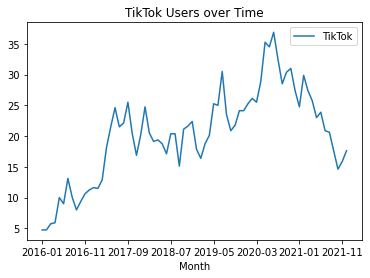

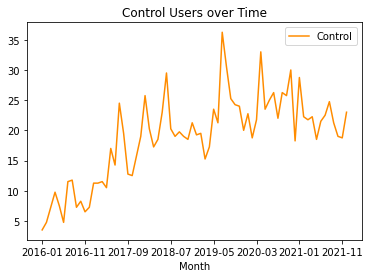

In [1079]:
Test.plot(x='Month', 
             y='TikTok', 
             title='TikTok Users over Time');
Test.plot(x='Month', 
             y='Control', 
              color='Darkorange',
                title='Control Users over Time');

<AxesSubplot:>

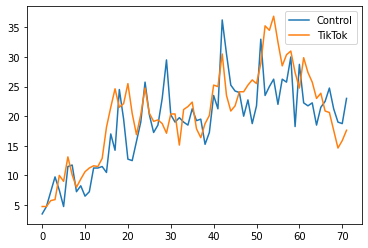

In [1080]:
Test.plot()

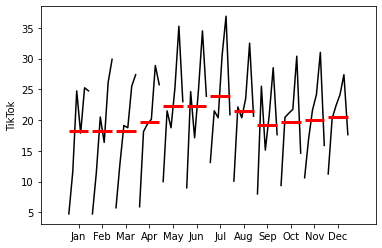

In [1081]:
Test8 = Test.set_index("Month")
Test8.index = pd.DatetimeIndex(Test8.index, freq='MS')
month_plot(Test8["TikTok"], ylabel='TikTok');

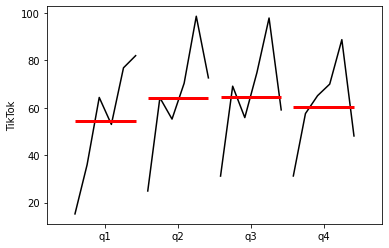

In [1082]:
quarter_plot(Test8["TikTok"].resample('Q').sum(), ylabel='TikTok');

In [1083]:
fig = px.line_polar(Test, r='TikTok', theta='Month', 
                    color='Month', line_close=True, 
                    title='Polar seasonal plot',
                    width=600, height=500)
fig.show()

<AxesSubplot:xlabel='Control', ylabel='TikTok'>

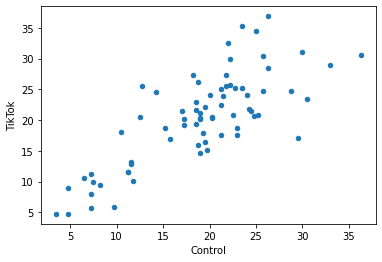

In [1084]:
Test.plot(kind = 'scatter', x = 'Control',y='TikTok')

In [1085]:
import numpy as np 
train_set, test_set= np.split(Test, [int(.67 *len(Test))])

<AxesSubplot:>

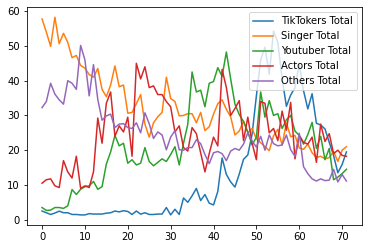

In [1086]:
Test3.plot()

In [1087]:
import numpy as np 
train_set2, test_set2= np.split(Test3, [int(.67 *len(Test3))])

In [1088]:
import numpy as np 
train_set3, test_set3= np.split(Test4, [int(.67 *len(Test4))])

In [1089]:
Test3

,Month,TikTokers Total,Singer Total,Youtuber Total,Actors Total,Others Total
0,2016-01,2.500000,57.750,3.500000,10.50,32.250
1,2016-02,2.000000,54.000,2.666667,11.50,34.000
2,2016-03,1.500000,49.875,2.750000,11.75,39.250
3,2016-04,1.916667,58.250,3.500000,9.75,36.125
4,2016-05,2.458333,50.625,3.500000,9.25,34.500
...,...,...,...,...,...,...
67,2021-08,22.250000,17.875,20.500000,24.75,11.375
68,2021-09,18.500000,19.625,11.500000,19.00,14.500
69,2021-10,13.500000,16.750,12.250000,20.00,10.875
70,2021-11,15.875000,20.000,13.250000,18.50,13.000


## work

In [1090]:
import numpy as np 
train_set4, test_set4= np.split(df4, [int(.67 *len(df4))])

In [1091]:
test_set4

,Name,V_Date,Views,V_Likes,V_Comments
408,justinbieber,2021-09,7800000,1080425,10802
409,justinbieber,2021-10,7466666,462800,5702
410,justinbieber,2021-11,3900000,319700,5362
411,kyliejenner,2019-11,14088888,1018955,2498
412,kyliejenner,2019-12,21750000,2075000,4525
...,...,...,...,...,...
604,taylorswift,2021-08,20100000,2750000,146750
605,taylorswift,2021-09,26355555,4244444,60177
606,taylorswift,2021-10,12100000,2100000,35650
607,taylorswift,2021-11,25190909,4609090,56609


# NEW START

## Data PreProcessing

try and get rid of all none TikTokers

In [1092]:
df = df[df.columns.drop(list(df.filter(regex='Total')))]
df = df[df.columns.drop(list(df.filter(regex='total')))]

change all columns to int and month to datetime

change to datetime

In [1093]:
df["Month"] = pd.to_datetime(df["Month"])

change to int

In [1094]:
# df[1:-1].astype(int)

create a list of celebs who have tiktok and delete them

In [1095]:
no_tt_cel = ['Pewdiepie','Millie Bobby Brown','Kim Kardashian','XXXTENTACION','Tom Holland','Donald Trump','Beyonce','Michael Jackson','Coco Quinn',
             'Kobe Bryant','Hayley LeBlanc','Txunamy','Zendaya','Emma Chamberlain','Cole Sprouse','Joe Biden']

In [1096]:
have_tt = ["Charli D'Amelio","Jules Leblanc","Addison Rae","Ariana Grande","Justin Bieber","Piper Rockelle","Jacob Satorious",
           "Dixie D'Amelio","Lil Huddy","JoJo Siwa","Maddie Ziegler","Mickenzie Ziegler","James Charles","Loren Grey",
           "Billie Eilish","Kylie Jenner","Selena Gomez","Taylor Swift","Cardi B","Shawn Mendes","Bryce Hall","Avani Gregg",
           "Olicia Rodrigo","Baby Ariel","Nicki Minaj","Cash Baker","Noah Beck","Tony Lopez","Jake Paul","Brent Rivera","David Dobrik",'Jules LeBlanc',
           'Jacob Sartorius','Mackenzie Ziegler','Loren Gray','Loren Gray','Josh Richardson']

In [1097]:
df_have_tt = df
for x in no_tt_cel:
  df_have_tt = df_have_tt[df_have_tt.columns.drop(list(df_have_tt.filter(regex=x)))]

In [1098]:
df_no_tt = df
for x in have_tt:
  df_no_tt = df_no_tt[df_no_tt.columns.drop(list(df_no_tt.filter(regex=x)))]

In [1099]:
Test['Control Difference'] = Test['Control'].diff()
Test['TikTok Difference'] = Test['TikTok'].diff()

/Users/nikodem/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/nikodem/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1100]:
ext = Test["TikTok Difference"]
df_have_tt.insert(137, "TikTok Difference", ext)

In [1101]:
ext = Test["Control Difference"]
df_no_tt.insert(73, "Control Difference", ext)

now we split both have tt and no tt into train and test\
and assign our X and our Y

## Train & Test , X & Y

In [1102]:
train, test= np.split(df_have_tt, [int(.67 *len(df_have_tt))])

In [1103]:
Y_train = train["TikTok Difference"]
Y_test = test["TikTok Difference"]

In [1104]:
target_variable = train.copy()
target_variable.drop("TikTok Difference", axis = 1, inplace = True)
X_train = target_variable
target_variable2 = test.copy()
target_variable2.drop("TikTok Difference", axis = 1, inplace = True)
X_test = target_variable2

In [1105]:
train2, test2= np.split(df_no_tt, [int(.67 *len(df_no_tt))])

In [1106]:
Y_train2 = train2["Control Difference"]
Y_test2 = test2["Control Difference"]

In [1107]:
target_variable3 = train2.copy()
target_variable3.drop("Control Difference", axis = 1, inplace = True)
X_train2 = target_variable3
target_variable4 = test2.copy()
target_variable4.drop("Control Difference", axis = 1, inplace = True)
X_test2 = target_variable4

In [1108]:
train['TikTok Difference'].describe()

count    47.000000
mean      0.412234
std       3.072558
min      -7.000000
25%      -1.437500
50%       0.500000
75%       2.750000
max       6.000000
Name: TikTok Difference, dtype: float64

In [1109]:
train2['Control Difference'].describe()

count    47.000000
mean      0.351064
std       4.599049
min      -9.250000
25%      -2.500000
50%       0.000000
75%       2.625000
max      15.000000
Name: Control Difference, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='TikTok Difference', ylabel='Density'>

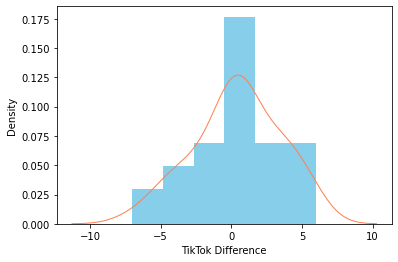

In [1110]:
sns.distplot(train['TikTok Difference'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"})

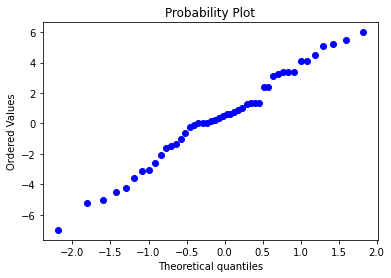

In [1111]:
fig = plt.figure()
res = stats.probplot(train['TikTok Difference'], dist="norm", plot=plt)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Control Difference', ylabel='Density'>

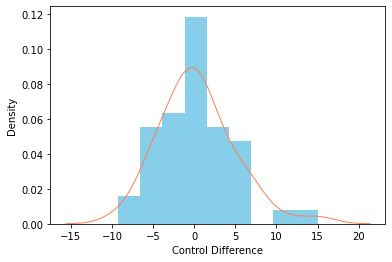

In [1112]:
sns.distplot(train2['Control Difference'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"})

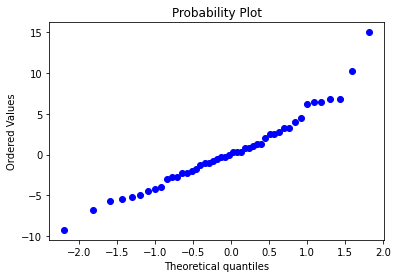

In [1113]:
fig = plt.figure()
res = stats.probplot(train2['Control Difference'], dist="norm", plot=plt)
plt.show()

## Modelling

In [1114]:
# from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import scale 
# import xgboost as xgb
# import lightgbm as lgb
# import numpy as np
# from tensorflow import keras
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *
# import numpy
# import matplotlib.pyplot as plt
# import pandas
# import math
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# # fix random seed for reproducibility
# numpy.random.seed(7)

In [1115]:
# model = Sequential()
# model.add(TimeDistributed(Dense(10), input_shape=(X_train.shape[1:])))
# model.add(Bidirectional(LSTM(8)))

In [1116]:
# n_folds = 5

# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
#     rmse= np.sqrt(-cross_val_score(model, train.values, target_variable, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)

# Online LSTM

In [1117]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
numpy.random.seed(7)

In [1118]:
of_test = Test[['Month']]
a = Test[['TikTok Difference']]
of_test.insert(1, "TikTok Difference", ext)

In [1119]:
of_test = of_test.fillna(0)

In [1120]:
of_test.to_csv('work.csv')

In [1121]:
dataframe = pandas.read_csv('work.csv', usecols=[2], engine='python')


In [1122]:
dataset = dataframe.values

In [1123]:
dataset = dataset.astype('float32')

In [1124]:
scaler = MinMaxScaler(feature_range=(1, 2))
dataset = scaler.fit_transform(dataset)

In [1125]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

48 24


In [1126]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [1127]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [1128]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
46/46 - 2s - loss: 2.2457 - 2s/epoch - 46ms/step
Epoch 2/100
46/46 - 0s - loss: 1.8561 - 72ms/epoch - 2ms/step
Epoch 3/100
46/46 - 0s - loss: 1.4934 - 81ms/epoch - 2ms/step
Epoch 4/100
46/46 - 0s - loss: 1.1552 - 69ms/epoch - 1ms/step
Epoch 5/100
46/46 - 0s - loss: 0.8564 - 66ms/epoch - 1ms/step
Epoch 6/100
46/46 - 0s - loss: 0.6021 - 63ms/epoch - 1ms/step
Epoch 7/100
46/46 - 0s - loss: 0.4065 - 66ms/epoch - 1ms/step
Epoch 8/100
46/46 - 0s - loss: 0.2647 - 46ms/epoch - 1ms/step
Epoch 9/100
46/46 - 0s - loss: 0.1677 - 46ms/epoch - 1ms/step
Epoch 10/100
46/46 - 0s - loss: 0.1079 - 45ms/epoch - 971us/step
Epoch 11/100
46/46 - 0s - loss: 0.0718 - 43ms/epoch - 932us/step
Epoch 12/100
46/46 - 0s - loss: 0.0525 - 48ms/epoch - 1ms/step
Epoch 13/100
46/46 - 0s - loss: 0.0429 - 45ms/epoch - 968us/step
Epoch 14/100
46/46 - 0s - loss: 0.0381 - 48ms/epoch - 1ms/step
Epoch 15/100
46/46 - 0s - loss: 0.0359 - 44ms/epoch - 965us/step
Epoch 16/100
46/46 - 0s - loss: 0.0350 - 51ms/epoch - 1ms

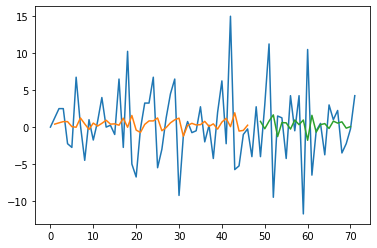

In [1129]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Online2 LSTM

In [1130]:
of_test = Test[['Month']]
a = Test[['Control Difference']]
of_test.insert(1, "Control Difference", ext)

In [1131]:
of_test = of_test.fillna(0)

In [1132]:
of_test.to_csv('work.csv')

In [1133]:
dataframe = pandas.read_csv('work.csv', usecols=[2], engine='python')

In [1134]:
dataset = dataframe.values

In [1135]:
dataset = dataset.astype('float32')

In [1136]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [1137]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

48 24


In [1138]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [1139]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [1140]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
46/46 - 2s - loss: 0.1831 - 2s/epoch - 39ms/step
Epoch 2/100
46/46 - 0s - loss: 0.1178 - 68ms/epoch - 1ms/step
Epoch 3/100
46/46 - 0s - loss: 0.0763 - 60ms/epoch - 1ms/step
Epoch 4/100
46/46 - 0s - loss: 0.0510 - 66ms/epoch - 1ms/step
Epoch 5/100
46/46 - 0s - loss: 0.0395 - 63ms/epoch - 1ms/step
Epoch 6/100
46/46 - 0s - loss: 0.0352 - 53ms/epoch - 1ms/step
Epoch 7/100
46/46 - 0s - loss: 0.0336 - 76ms/epoch - 2ms/step
Epoch 8/100
46/46 - 0s - loss: 0.0332 - 65ms/epoch - 1ms/step
Epoch 9/100
46/46 - 0s - loss: 0.0327 - 69ms/epoch - 1ms/step
Epoch 10/100
46/46 - 0s - loss: 0.0327 - 48ms/epoch - 1ms/step
Epoch 11/100
46/46 - 0s - loss: 0.0325 - 45ms/epoch - 979us/step
Epoch 12/100
46/46 - 0s - loss: 0.0322 - 44ms/epoch - 952us/step
Epoch 13/100
46/46 - 0s - loss: 0.0321 - 42ms/epoch - 915us/step
Epoch 14/100
46/46 - 0s - loss: 0.0321 - 44ms/epoch - 962us/step
Epoch 15/100
46/46 - 0s - loss: 0.0319 - 43ms/epoch - 937us/step
Epoch 16/100
46/46 - 0s - loss: 0.0317 - 43ms/epoch - 9

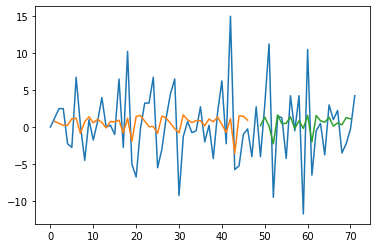

In [1141]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Online3 ARIMA & Samrima

[Amrima & Sarima](https://www.kaggle.com/code/harshjain123/time-series-arima-sarima/notebook)

In [1142]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [1143]:
df=pd.read_csv('work.csv',usecols=[1,2], engine='python')

In [1144]:
df.columns=["Month","TikTok_d"]
df.head()

,Month,TikTok_d
0,2016-01,0.00
1,2016-02,1.25
2,2016-03,2.50
3,2016-04,2.50
4,2016-05,-2.25


In [1145]:
df['Month']=pd.to_datetime(df['Month'])

In [1146]:
df.set_index('Month',inplace=True)

In [1147]:
df.describe()

,TikTok_d
count,72.000000
mean,0.270833
std,4.801289
min,-11.750000
25%,-2.750000
50%,0.125000
75%,2.812500
max,15.000000


<AxesSubplot:xlabel='Month'>

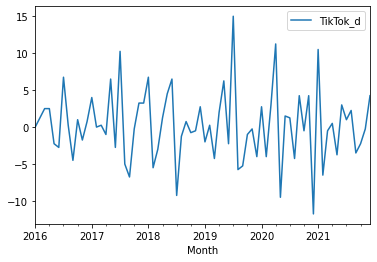

In [1148]:
df.plot()

In [1149]:
from statsmodels.tsa.stattools import adfuller

In [1150]:
test_result=adfuller(df['TikTok_d'])

In [1151]:
def adfuller_test(TikTok_d):
    
    result=adfuller(TikTok_d)
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [1152]:
adfuller_test(df['TikTok_d'])

ADF Test Statistic : -6.94115470077529
p-value : 1.0242994067691985e-09
#Lags Used : 3
Number of Observations Used : 68
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [1153]:
df['Seasonal First Difference']=df['TikTok_d']-df['TikTok_d'].shift(12)

In [1154]:
df.head(14)

,TikTok_d,Seasonal First Difference
Month,,
2016-01-01,0.00,NaN
2016-02-01,1.25,NaN
2016-03-01,2.50,NaN
2016-04-01,2.50,NaN
2016-05-01,-2.25,NaN
2016-06-01,-2.75,NaN
2016-07-01,6.75,NaN
2016-08-01,0.25,NaN
2016-09-01,-4.50,NaN


In [1155]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.423786065375625
p-value : 0.13513519427630755
#Lags Used : 11
Number of Observations Used : 48
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

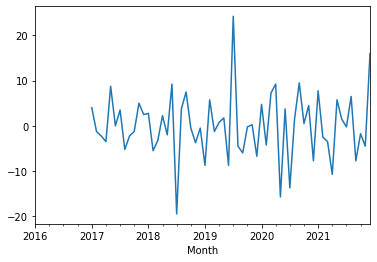

In [1156]:
df['Seasonal First Difference'].plot()

In [1157]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

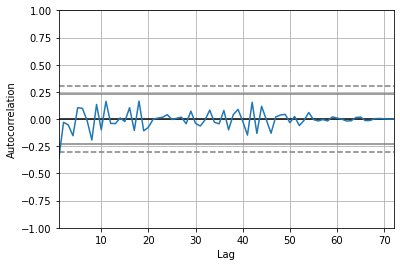

In [1158]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['TikTok_d'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



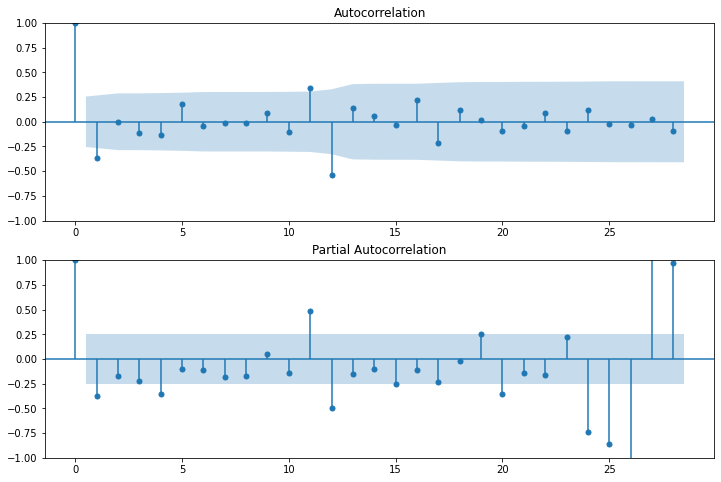

In [1159]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=28,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=28,ax=ax2)

In [1160]:
from statsmodels.tsa.arima.model import ARIMA

In [1161]:
model=ARIMA(df['TikTok_d'],order=(1,1,1))
model_fit=model.fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1162]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               TikTok_d   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -209.670
Date:                Wed, 25 May 2022   AIC                            425.340
Time:                        11:30:52   BIC                            432.128
Sample:                    01-01-2016   HQIC                           428.039
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3493      0.109     -3.217      0.001      -0.562      -0.137
ma.L1         -0.9998     15.974     -0.063      0.950     -32.308      30.308
sigma2        20.0463    320.020      0.063      0.950    -607.182     647.275
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 4.72
Prob(Q):                              0.47   Prob(JB):                         0.09
Heteroskedasticity (H):               1.23   Skew:                             0.49
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

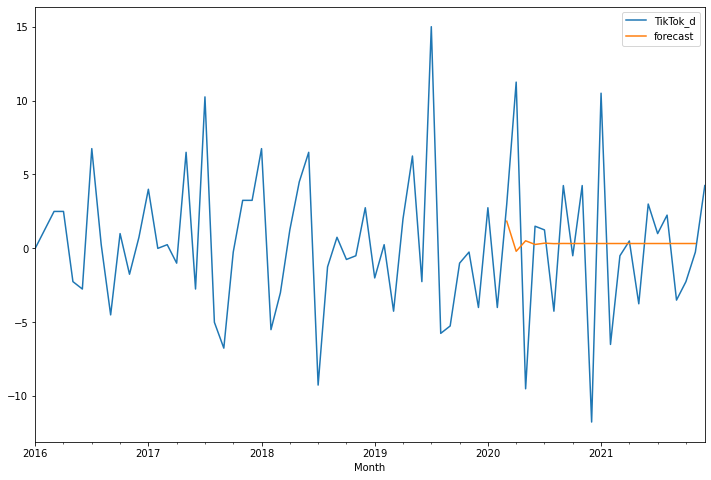

In [1163]:
df['forecast']=model_fit.predict(start=50,end=70,dynamic=True)
df[['TikTok_d','forecast']].plot(figsize=(12,8))

In [1164]:
import statsmodels.api as sm

In [1165]:
model=sm.tsa.statespace.SARIMAX(df['TikTok_d'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.75095D+00    |proj g|=  5.22738D-02

At iterate    5    f=  2.57694D+00    |proj g|=  7.97438D-02

At iterate   10    f=  2.54923D+00    |proj g|=  6.01691D-03

At iterate   15    f=  2.54578D+00    |proj g|=  2.96441D-03

At iterate   20    f=  2.54491D+00    |proj g|=  3.06371D-03

At iterate   25    f=  2.54482D+00    |proj g|=  4.45706D-04

At iterate   30    f=  2.54480D+00    |proj g|=  1.23459D-04

At iterate   35    f=  2.54479D+00    |proj g|=  3.45148D-04

At iterate   40    f=  2.54479D+00    |proj g|=  4.47580D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

<AxesSubplot:xlabel='Month'>

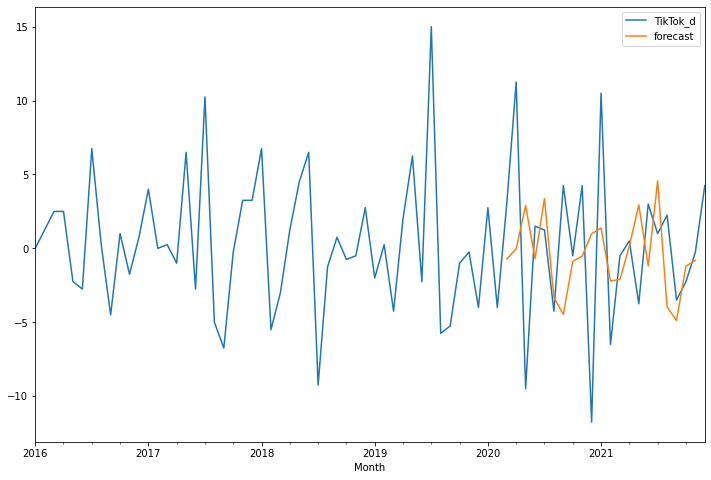

In [1166]:
df['forecast']=results.predict(start=50,end=70,dynamic=True)
df[['TikTok_d','forecast']].plot(figsize=(12,8))

In [1167]:
from pandas.tseries.offsets import DateOffset

#Here USING FOR LOOP we are adding some additional data for prediction purpose:

future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [1168]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [1169]:
future_datest_df.tail()

,TikTok_d,Seasonal First Difference,forecast
2023-07-01,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN


In [1170]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

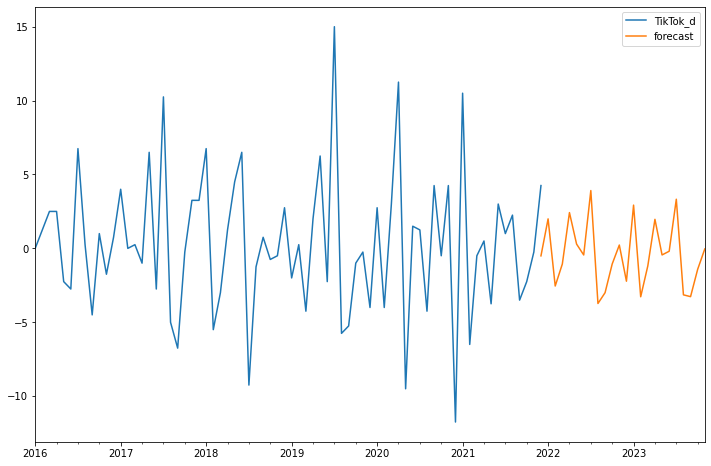

In [1171]:
future_df['forecast'] = results.predict(start = 71, end = 120, dynamic= True)  
future_df[['TikTok_d', 'forecast']].plot(figsize=(12, 8))

# New Idea

## test1&2

take total of test2 gowth make it exponential
predict who gets to a higher point in the future dictating who shall be superior

In [1172]:
Test2

,Month,TikTok
0,2016-01,4.750000
1,2016-02,4.750000
2,2016-03,5.750000
3,2016-04,5.916667
4,2016-05,10.000000
...,...,...
67,2021-08,20.625000
68,2021-09,17.625000
69,2021-10,14.625000
70,2021-11,15.875000


More EDA

In [1173]:
Test

,Month,Control,TikTok,Control Difference,TikTok Difference
0,2016-01,3.50,4.750000,NaN,NaN
1,2016-02,4.75,4.750000,1.25,0.000000
2,2016-03,7.25,5.750000,2.50,1.000000
3,2016-04,9.75,5.916667,2.50,0.166667
4,2016-05,7.50,10.000000,-2.25,4.083333
...,...,...,...,...,...
67,2021-08,24.75,20.625000,2.25,-0.250000
68,2021-09,21.25,17.625000,-3.50,-3.000000
69,2021-10,19.00,14.625000,-2.25,-3.000000
70,2021-11,18.75,15.875000,-0.25,1.250000


In [1174]:
Test

,Month,Control,TikTok,Control Difference,TikTok Difference
0,2016-01,3.50,4.750000,NaN,NaN
1,2016-02,4.75,4.750000,1.25,0.000000
2,2016-03,7.25,5.750000,2.50,1.000000
3,2016-04,9.75,5.916667,2.50,0.166667
4,2016-05,7.50,10.000000,-2.25,4.083333
...,...,...,...,...,...
67,2021-08,24.75,20.625000,2.25,-0.250000
68,2021-09,21.25,17.625000,-3.50,-3.000000
69,2021-10,19.00,14.625000,-2.25,-3.000000
70,2021-11,18.75,15.875000,-0.25,1.250000


In [1175]:
Test['Control_sum'] = Test.Control.cumsum()
Test['TikTok_sum'] = Test.TikTok.cumsum()

/Users/nikodem/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/nikodem/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1176]:
ul_test = Test[['Month']].copy()

In [1177]:
ap = Test[['Control_sum']].copy()
ul_test.insert(1, "Control_sum", ap)

In [1178]:
ul_test2 = Test[['Month']].copy()

In [1179]:
ap2 = Test[['TikTok_sum']].copy()
ul_test2.insert(1, "TikTok_sum", ap2)

In [1180]:
ul_test2

,Month,TikTok_sum
0,2016-01,4.750000
1,2016-02,9.500000
2,2016-03,15.250000
3,2016-04,21.166667
4,2016-05,31.166667
...,...,...
67,2021-08,1396.708333
68,2021-09,1414.333333
69,2021-10,1428.958333
70,2021-11,1444.833333


In [1181]:
ul_test.to_csv('test.csv')
ul_test2.to_csv('test2.csv')

# Online4 ARIMA & Samrima 2

[Amrima & Sarima](https://www.kaggle.com/code/harshjain123/time-series-arima-sarima/notebook)

In [1182]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [1183]:
df=pd.read_csv('test2.csv',usecols=[1,2], engine='python')

In [1184]:
df.columns=["Month","TikTok_sum"]
df.head()

,Month,TikTok_sum
0,2016-01,4.750000
1,2016-02,9.500000
2,2016-03,15.250000
3,2016-04,21.166667
4,2016-05,31.166667


In [1185]:
df['Month']=pd.to_datetime(df['Month'])

In [1186]:
df.set_index('Month',inplace=True)

In [1187]:
df.describe()

,TikTok_sum
count,72.000000
mean,636.894676
std,462.794001
min,4.750000
25%,219.000000
50%,579.145833
75%,1023.177083
max,1462.458333


<AxesSubplot:xlabel='Month'>

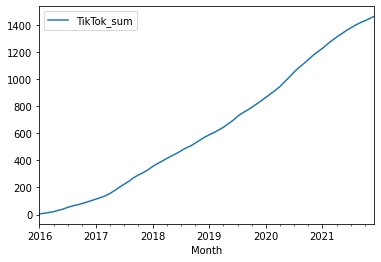

In [1188]:
df.plot()

In [1189]:
from statsmodels.tsa.stattools import adfuller

In [1190]:
test_result=adfuller(df['TikTok_sum'])

In [1191]:
def adfuller_test(TikTok_sum):
    
    result=adfuller(TikTok_sum)
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [1192]:
adfuller_test(df['TikTok_sum'])

ADF Test Statistic : 0.1948891902711813
p-value : 0.9719734829883644
#Lags Used : 1
Number of Observations Used : 70
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [1193]:
df['Seasonal First Difference']=df['TikTok_sum']-df['TikTok_sum'].shift(42)
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.9281186022241754
p-value : 0.001837383842354497
#Lags Used : 7
Number of Observations Used : 22
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [1194]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.9281186022241754
p-value : 0.001837383842354497
#Lags Used : 7
Number of Observations Used : 22
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [1195]:
df.head(14)

,TikTok_sum,Seasonal First Difference
Month,,
2016-01-01,4.750000,NaN
2016-02-01,9.500000,NaN
2016-03-01,15.250000,NaN
2016-04-01,21.166667,NaN
2016-05-01,31.166667,NaN
2016-06-01,40.166667,NaN
2016-07-01,53.291667,NaN
2016-08-01,63.375000,NaN
2016-09-01,71.375000,NaN


In [1196]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.9281186022241754
p-value : 0.001837383842354497
#Lags Used : 7
Number of Observations Used : 22
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

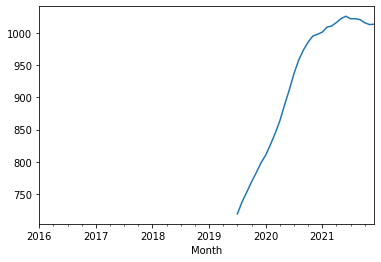

In [1197]:
df['Seasonal First Difference'].plot()

In [1198]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

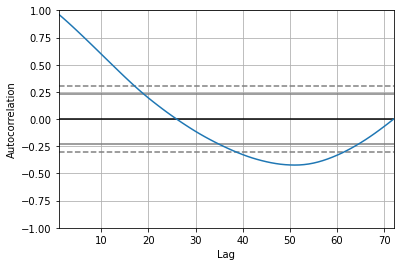

In [1199]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['TikTok_sum'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



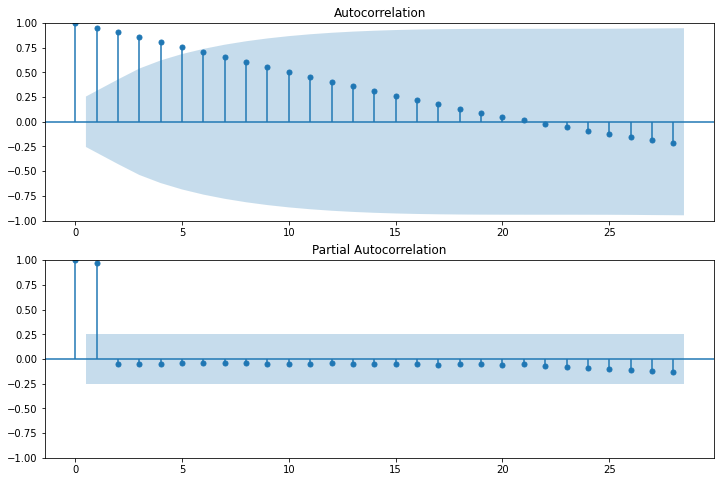

In [1200]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['TikTok_sum'].iloc[13:],lags=28,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['TikTok_sum'].iloc[13:],lags=28,ax=ax2)

In [1201]:
from statsmodels.tsa.arima.model import ARIMA

In [1202]:
model=ARIMA(df['TikTok_sum'],order=(1,1,1))
model_fit=model.fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1203]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             TikTok_sum   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -180.422
Date:                Wed, 25 May 2022   AIC                            366.843
Time:                        11:30:57   BIC                            373.631
Sample:                    01-01-2016   HQIC                           369.543
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9876      0.014     70.624      0.000       0.960       1.015
ma.L1         -0.0761      0.117     -0.650      0.516      -0.306       0.153
sigma2         8.9747      1.849      4.853      0.000       5.350      12.599
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.99   Prob(JB):                         0.57
Heteroskedasticity (H):               0.94   Skew:                             0.03
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

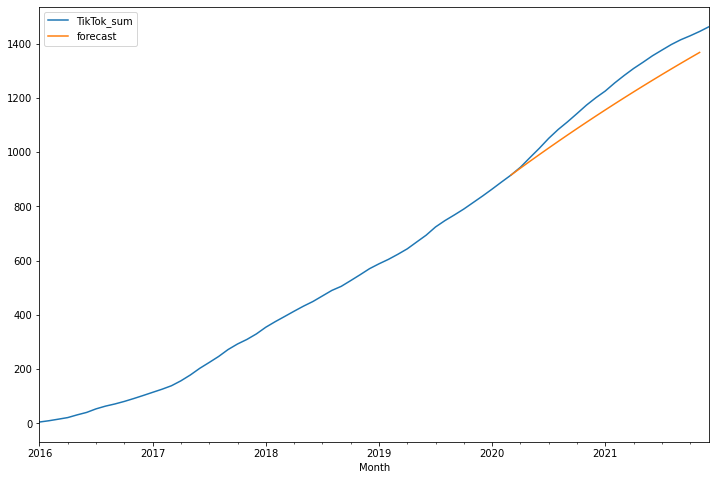

In [1204]:
df['forecast']=model_fit.predict(start=50,end=70,dynamic=True)
df[['TikTok_sum','forecast']].plot(figsize=(12,8))

In [1205]:
import statsmodels.api as sm

In [1206]:
model=sm.tsa.statespace.SARIMAX(df['TikTok_sum'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36378D+00    |proj g|=  1.94600D-01

At iterate    5    f=  2.24062D+00    |proj g|=  1.57800D-01

At iterate   10    f=  2.18388D+00    |proj g|=  2.87915D-02

At iterate   15    f=  2.17384D+00    |proj g|=  6.86884D-03

At iterate   20    f=  2.17293D+00    |proj g|=  6.29933D-04

At iterate   25    f=  2.17291D+00    |proj g|=  1.74307D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

<AxesSubplot:xlabel='Month'>

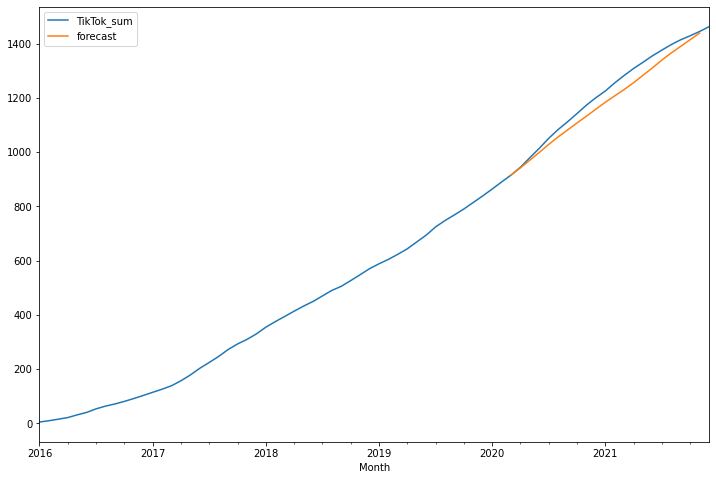

In [1207]:
df['forecast']=results.predict(start=50,end=70,dynamic=True)
df[['TikTok_sum','forecast']].plot(figsize=(12,8))

In [1208]:
from pandas.tseries.offsets import DateOffset

#Here USING FOR LOOP we are adding some additional data for prediction purpose:

future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [1209]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [1210]:
future_datest_df.tail()

,TikTok_sum,Seasonal First Difference,forecast
2023-07-01,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN


In [1211]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

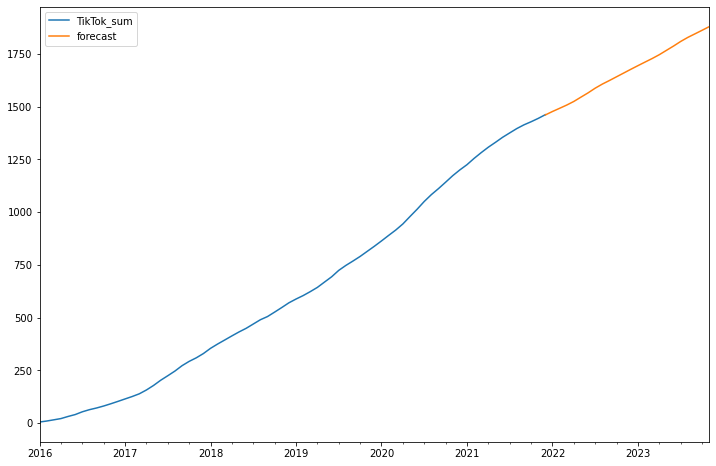

In [1212]:
future_df['forecast'] = results.predict(start = 71, end = 120, dynamic= True)  
future_df[['TikTok_sum', 'forecast']].plot(figsize=(12, 8))

# Online5 ARIMA & Samrima 3

[Amrima & Sarima](https://www.kaggle.com/code/harshjain123/time-series-arima-sarima/notebook)

In [1213]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [1214]:
df=pd.read_csv('test.csv',usecols=[1,2], engine='python')

In [1215]:
df.columns=["Month","Control_sum"]
df.head()

,Month,Control_sum
0,2016-01,3.50
1,2016-02,8.25
2,2016-03,15.50
3,2016-04,25.25
4,2016-05,32.75


In [1216]:
df['Month']=pd.to_datetime(df['Month'])

In [1217]:
df.set_index('Month',inplace=True)

In [1218]:
df.describe()

,Control_sum
count,72.000000
mean,582.107639
std,428.162027
min,3.500000
25%,184.125000
50%,531.375000
75%,949.312500
max,1355.500000


<AxesSubplot:xlabel='Month'>

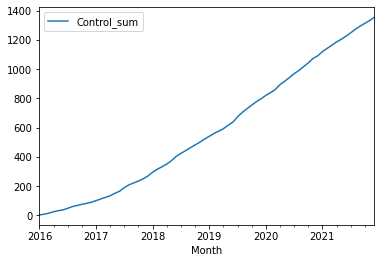

In [1219]:
df.plot()

In [1220]:
from statsmodels.tsa.stattools import adfuller

In [1221]:
test_result=adfuller(df['Control_sum'])

In [1222]:
def adfuller_test(Control_sum):
    
    result=adfuller(Control_sum)
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [1223]:
adfuller_test(df['Control_sum'])

ADF Test Statistic : 2.477132346791927
p-value : 0.9990421035309999
#Lags Used : 1
Number of Observations Used : 70
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [1224]:
df['Seasonal First Difference']=df['Control_sum']-df['Control_sum'].shift(12)

In [1225]:
df.head(14)

,Control_sum,Seasonal First Difference
Month,,
2016-01-01,3.50,NaN
2016-02-01,8.25,NaN
2016-03-01,15.50,NaN
2016-04-01,25.25,NaN
2016-05-01,32.75,NaN
2016-06-01,37.50,NaN
2016-07-01,49.00,NaN
2016-08-01,60.75,NaN
2016-09-01,68.00,NaN


In [1226]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.0242600329440563
p-value : 0.032690094047099404
#Lags Used : 1
Number of Observations Used : 58
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

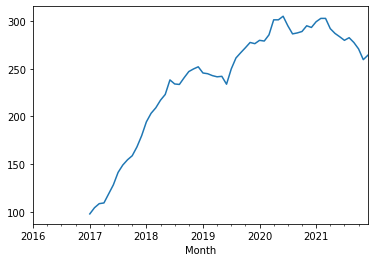

In [1227]:
df['Seasonal First Difference'].plot()

In [1228]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

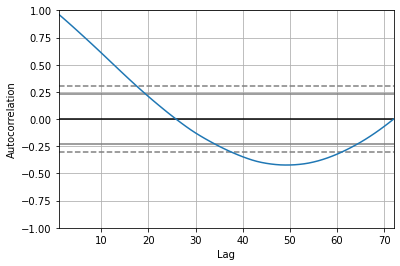

In [1229]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Control_sum'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



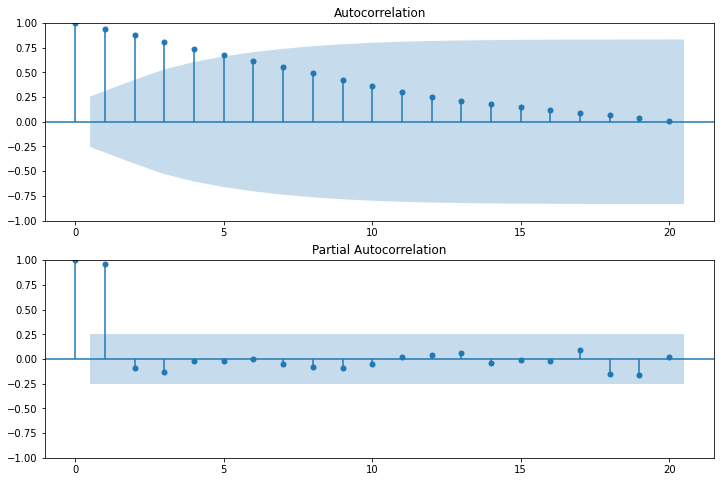

In [1230]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=20,ax=ax2)

In [1231]:
from statsmodels.tsa.arima.model import ARIMA

In [1232]:
model=ARIMA(df['Control_sum'],order=(1,1,1))
model_fit=model.fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1233]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Control_sum   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -205.831
Date:                Wed, 25 May 2022   AIC                            417.662
Time:                        11:31:02   BIC                            424.450
Sample:                    01-01-2016   HQIC                           420.361
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9953      0.009    108.885      0.000       0.977       1.013
ma.L1         -0.6201      0.112     -5.543      0.000      -0.839      -0.401
sigma2        18.4395      2.389      7.717      0.000      13.756      23.123
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                23.49
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             1.06
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

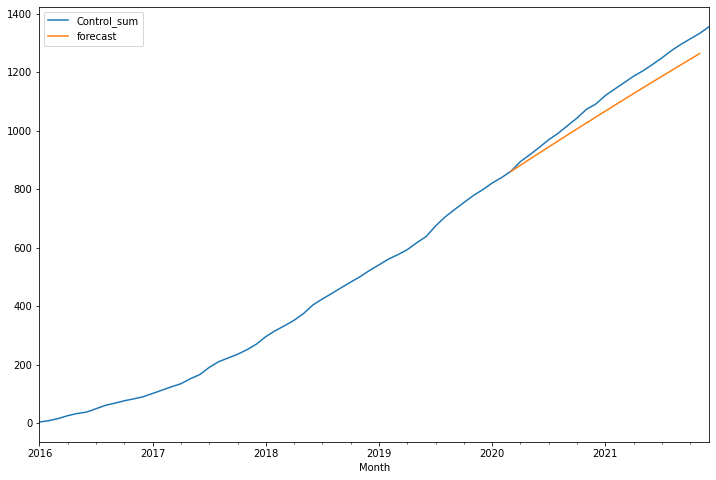

In [1234]:
df['forecast']=model_fit.predict(start=50,end=70,dynamic=True)
df[['Control_sum','forecast']].plot(figsize=(12,8))

In [1235]:
import statsmodels.api as sm

In [1236]:
model=sm.tsa.statespace.SARIMAX(df['Control_sum'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56909D+00    |proj g|=  8.54021D-02

At iterate    5    f=  2.47231D+00    |proj g|=  5.08443D-02

At iterate   10    f=  2.45620D+00    |proj g|=  1.00646D-02

At iterate   15    f=  2.45215D+00    |proj g|=  3.34651D-03

At iterate   20    f=  2.45158D+00    |proj g|=  6.29378D-04

At iterate   25    f=  2.45148D+00    |proj g|=  5.18021D-04

At iterate   30    f=  2.45145D+00    |proj g|=  8.21562D-04

At iterate   35    f=  2.45145D+00    |proj g|=  2.62988D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<AxesSubplot:xlabel='Month'>

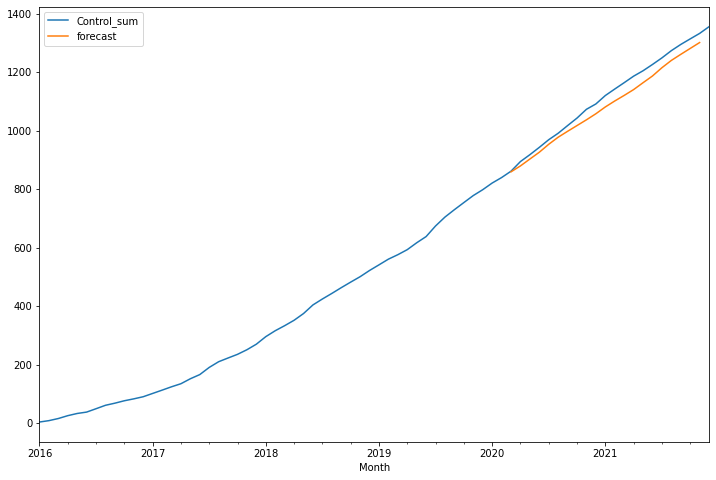

In [1237]:
df['forecast']=results.predict(start=50,end=70,dynamic=True)
df[['Control_sum','forecast']].plot(figsize=(12,8))

In [1238]:
from pandas.tseries.offsets import DateOffset

#Here USING FOR LOOP we are adding some additional data for prediction purpose:

future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [1239]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [1240]:
future_datest_df.tail()

,Control_sum,Seasonal First Difference,forecast
2023-07-01,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN


In [1241]:
future_df2=pd.concat([df,future_datest_df])

<AxesSubplot:>

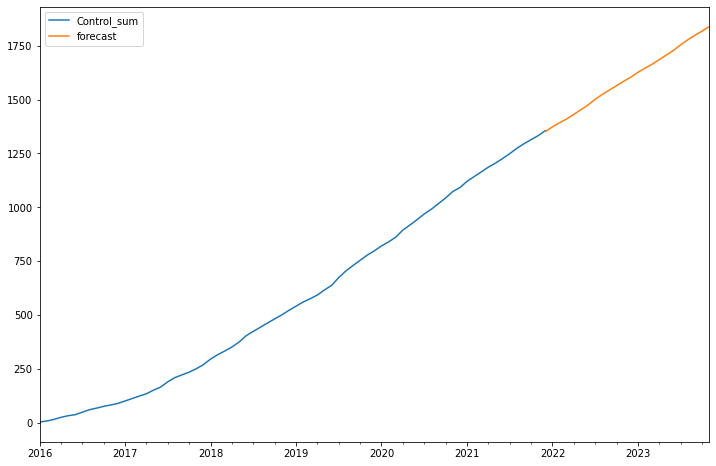

In [1242]:
future_df2['forecast'] = results.predict(start = 71, end = 120, dynamic= True)  
future_df2[['Control_sum', 'forecast']].plot(figsize=(12, 8))

# Conclusion

<AxesSubplot:>

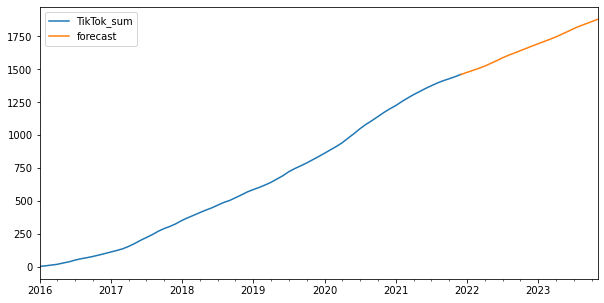

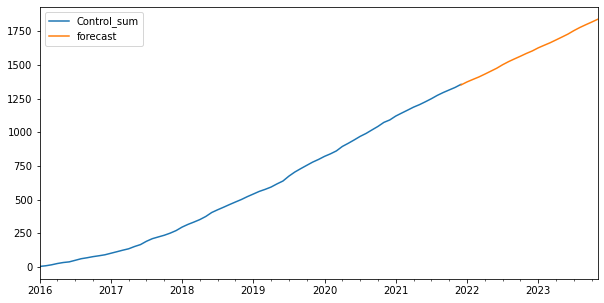

In [1243]:
future_df[['TikTok_sum', 'forecast']].plot(figsize=(10, 5))
future_df2[['Control_sum', 'forecast']].plot(figsize=(10, 5))

In [1244]:
future_df = future_df.drop('Seasonal First Difference',axis=1)

In [1245]:
future_df2 = future_df2.drop('Seasonal First Difference',axis=1)

<AxesSubplot:>

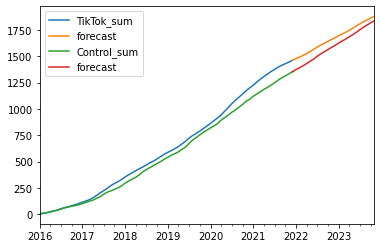

In [1246]:
ax = future_df.plot()
future_df2.plot(ax=ax)

In [1247]:
future_df.max()

TikTok_sum    1462.458333
forecast      1879.823332
dtype: float64

In [1248]:
future_df2.max()

Control_sum    1355.500000
forecast       1837.951291
dtype: float64

# TikTok Correlates with tiktokers growth on google/yt

In [1249]:
df4

,Name,V_Date,Views,V_Likes,V_Comments
0,addisonre,2019-07,8431578,1112921,21930
1,addisonre,2019-08,5662500,781181,6234
2,addisonre,2019-09,4987500,655275,6045
3,addisonre,2019-10,5142857,708554,4447
4,addisonre,2019-11,12794827,1522032,6892
...,...,...,...,...,...
604,taylorswift,2021-08,20100000,2750000,146750
605,taylorswift,2021-09,26355555,4244444,60177
606,taylorswift,2021-10,12100000,2100000,35650
607,taylorswift,2021-11,25190909,4609090,56609


In [1250]:
df9

,Name,date,TikTok_uploads
0,addisonre,2019-07,19
1,addisonre,2019-08,16
2,addisonre,2019-09,24
3,addisonre,2019-10,42
4,addisonre,2019-11,58
...,...,...,...
604,taylorswift,2021-08,2
605,taylorswift,2021-09,9
606,taylorswift,2021-10,2
607,taylorswift,2021-11,11


In [1251]:
df4 = df4.drop ('V_Likes',axis=1)
df4 = df4.drop ('V_Comments',axis=1)

In [1252]:
df5=df4.groupby('V_Date').sum()
df5 = df5.reset_index()

In [1253]:
df10=df9.groupby('date').sum()

In [1254]:
df7=df4.groupby('V_Date')['Views'].transform('sum')

In [1255]:
df10

,TikTok_uploads
date,
2016-01,205
2016-02,185
2016-03,225
2016-04,205
2016-05,262
...,...
2021-08,274
2021-09,310
2021-10,397


In [1256]:
df4

,Name,V_Date,Views
0,addisonre,2019-07,8431578
1,addisonre,2019-08,5662500
2,addisonre,2019-09,4987500
3,addisonre,2019-10,5142857
4,addisonre,2019-11,12794827
...,...,...,...
604,taylorswift,2021-08,20100000
605,taylorswift,2021-09,26355555
606,taylorswift,2021-10,12100000
607,taylorswift,2021-11,25190909


In [1257]:
df5

,V_Date,Views
0,2016-01,1822612
1,2016-02,2066889
2,2016-03,2002328
3,2016-04,2484429
4,2016-05,210193520
...,...,...
65,2021-08,252426165
66,2021-09,224516647
67,2021-10,415906882
68,2021-11,197879102


In [1258]:
# df5["V_Date"] = pd.to_datetime(df5["V_Date"])

In [1259]:
df6 = df5.set_index('V_Date')

df6 = df6.sort_index()

In [1260]:
df6

,Views
V_Date,
2016-01,1822612
2016-02,2066889
2016-03,2002328
2016-04,2484429
2016-05,210193520
...,...
2021-08,252426165
2021-09,224516647
2021-10,415906882


In [1261]:
df6 = df6.reindex(pd.period_range(df6.index[0],df6.index[-1],freq='M'))
df6=df6.fillna(0.0)

In [1262]:
df6=df6.fillna(0.0)

In [1263]:
# Test2 = Test.set_index('date')

In [1264]:
df6= df6.reset_index()

In [1265]:
ex1 = df6["Views"]
Test2.insert(2, "Views", ex1)

In [1266]:
ex1

0       1822612.0
1       2066889.0
2       2002328.0
3       2484429.0
4     210193520.0
         ...     
67    252426165.0
68    224516647.0
69    415906882.0
70    197879102.0
71    198717388.0
Name: Views, Length: 72, dtype: float64

In [1267]:
# Test2 = Test2.drop('Views',axis=1)

In [1268]:
Test2

,Month,TikTok,Views
0,2016-01,4.750000,1822612.0
1,2016-02,4.750000,2066889.0
2,2016-03,5.750000,2002328.0
3,2016-04,5.916667,2484429.0
4,2016-05,10.000000,210193520.0
...,...,...,...
67,2021-08,20.625000,252426165.0
68,2021-09,17.625000,224516647.0
69,2021-10,14.625000,415906882.0
70,2021-11,15.875000,197879102.0


In [1269]:
rtest = Test2.set_index('Month')

rtest = rtest.sort_index()

In [1270]:
rtest

,TikTok,Views
Month,,
2016-01,4.750000,1822612.0
2016-02,4.750000,2066889.0
2016-03,5.750000,2002328.0
2016-04,5.916667,2484429.0
2016-05,10.000000,210193520.0
...,...,...
2021-08,20.625000,252426165.0
2021-09,17.625000,224516647.0
2021-10,14.625000,415906882.0


In [1271]:
rtest['Views'] = rtest['Views'].div(10000000).round(2)

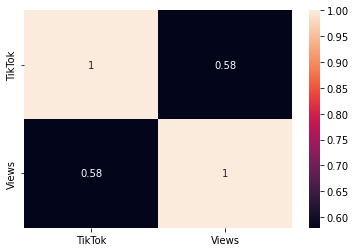

In [1272]:
import seaborn as sn
corrMatrix = rtest.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:xlabel='Month'>

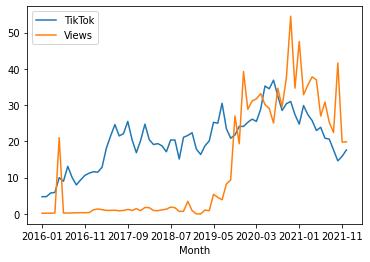

In [1273]:
rtest.plot()

In [1274]:
Test2.corr()

,TikTok,Views
TikTok,1.000000,0.579199
Views,0.579199,1.000000


In [1275]:
rtest.corr()

,TikTok,Views
TikTok,1.000000,0.579219
Views,0.579219,1.000000


In [1276]:
rtest

,TikTok,Views
Month,,
2016-01,4.750000,0.18
2016-02,4.750000,0.21
2016-03,5.750000,0.20
2016-04,5.916667,0.25
2016-05,10.000000,21.02
...,...,...
2021-08,20.625000,25.24
2021-09,17.625000,22.45
2021-10,14.625000,41.59


<AxesSubplot:xlabel='date'>

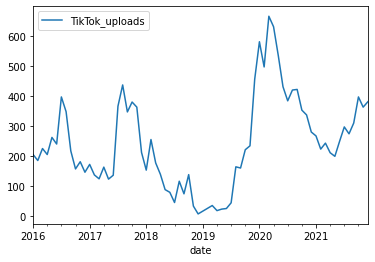

In [1277]:
df10.plot()

# eda for new files

In [1278]:
url = 'https://raw.githubusercontent.com/nikodemadamski/FYP/main/celebrities%20dataset.csv'
url2 = 'https://raw.githubusercontent.com/nikodemadamski/FYP/main/tiktok_1(1).csv'
url3 = 'https://raw.githubusercontent.com/nikodemadamski/FYP/main/insta_upload.csv'
url4 = 'https://raw.githubusercontent.com/nikodemadamski/FYP/main/tw_upload.csv'
url5 = 'https://raw.githubusercontent.com/nikodemadamski/FYP/main/yt_upload.csv'
download = requests.get(url).content
download2 = requests.get(url2).content
download3 = requests.get(url3).content
download4 = requests.get(url4).content
download5 = requests.get(url5).content


df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df2 = pd.read_csv(io.StringIO(download2.decode('utf-8')))
insta_upload = pd.read_csv(io.StringIO(download3.decode('utf-8')))
tw_upload = pd.read_csv(io.StringIO(download4.decode('utf-8')))
yt_upload = pd.read_csv(io.StringIO(download5.decode('utf-8')))

In [1279]:
insta_upload

,Name,Date,Followers,Growth,Uploads
0,@charlidamelio,2021-10-17,"44,411,280","+284,187",9.0
1,@charlidamelio,2021-10-04,"44,127,093","+1,073,653",27.0
2,@charlidamelio,2021-08-16,"43,053,440","+1,213,714",45.0
3,@charlidamelio,2021-05-23,"41,839,726","+929,247",20.0
4,@charlidamelio,2021-04-24,"40,910,479","+381,588",5.0
...,...,...,...,...,...
1105,@gavinmagnus,2020-07-31,"1,698,361","+132,919",15.0
1106,@gavinmagnus,2020-06-24,"1,565,442","+99,016",8.0
1107,@gavinmagnus,2020-05-31,"1,466,426","+19,397",1.0
1108,@gavinmagnus,2020-05-27,"1,447,029",NaN,NaN


In [1280]:
insta_upload.drop('Followers', axis=1, inplace=True)
insta_upload.drop('Growth', axis=1, inplace=True)

In [1281]:
insta_upload

,Name,Date,Uploads
0,@charlidamelio,2021-10-17,9.0
1,@charlidamelio,2021-10-04,27.0
2,@charlidamelio,2021-08-16,45.0
3,@charlidamelio,2021-05-23,20.0
4,@charlidamelio,2021-04-24,5.0
...,...,...,...
1105,@gavinmagnus,2020-07-31,15.0
1106,@gavinmagnus,2020-06-24,8.0
1107,@gavinmagnus,2020-05-31,1.0
1108,@gavinmagnus,2020-05-27,NaN


In [1282]:
tw_upload.dropna()

,Name,Date,upload_tweet
0,charlidamelio,2021-11-15,3.0
1,charlidamelio,2021-11-14,12.0
2,charlidamelio,2021-11-12,41.0
3,charlidamelio,2021-11-09,5.0
4,charlidamelio,2021-11-07,3.0
...,...,...,...
3247,DavidDobrik,2020-08-15,2.0
3249,DavidDobrik,2020-07-05,2.0
3250,DavidDobrik,2020-06-13,1.0
3251,DavidDobrik,2020-06-07,4.0


In [1283]:
tw_upload

,Name,Date,upload_tweet
0,charlidamelio,2021-11-15,3.0
1,charlidamelio,2021-11-14,12.0
2,charlidamelio,2021-11-12,41.0
3,charlidamelio,2021-11-09,5.0
4,charlidamelio,2021-11-07,3.0
...,...,...,...
3253,DavidDobrik,2020-05-23,NaN
3254,DavidDobrik,2020-05-18,NaN
3255,DavidDobrik,2020-05-14,NaN
3256,DavidDobrik,Total Summary,NaN


In [1284]:
yt_upload

,Name,Date,yt_upload
0,charlidamelio,2021-12-30,NaN
1,charlidamelio,2021-12-29,NaN
2,charlidamelio,2021-12-27,NaN
3,charlidamelio,2021-12-26,1.0
4,charlidamelio,2021-12-24,2.0
...,...,...,...
2741,gavinmagnusofficial,2022-03-29,NaN
2742,gavinmagnusofficial,2022-03-27,NaN
2743,gavinmagnusofficial,2022-03-26,1.0
2744,gavinmagnusofficial,2022-03-24,NaN


In [1285]:
yt_upload.dropna(subset=['Name'])

,Name,Date,yt_upload
0,charlidamelio,2021-12-30,NaN
1,charlidamelio,2021-12-29,NaN
2,charlidamelio,2021-12-27,NaN
3,charlidamelio,2021-12-26,1.0
4,charlidamelio,2021-12-24,2.0
...,...,...,...
2741,gavinmagnusofficial,2022-03-29,NaN
2742,gavinmagnusofficial,2022-03-27,NaN
2743,gavinmagnusofficial,2022-03-26,1.0
2744,gavinmagnusofficial,2022-03-24,NaN


In [1286]:
insta_upload=insta_upload.fillna(0)
tw_upload=tw_upload.fillna(0)
yt_upload=yt_upload.fillna(0)

In [1287]:
insta_upload = insta_upload[insta_upload["Date"].str.contains("Total Summary")==False]
tw_upload = tw_upload[tw_upload["Date"].str.contains("Total Summary")==False]
yt_upload = yt_upload[yt_upload["Date"].str.contains("Total Summary")==False]

In [1288]:
insta_upload

,Name,Date,Uploads
0,@charlidamelio,2021-10-17,9.0
1,@charlidamelio,2021-10-04,27.0
2,@charlidamelio,2021-08-16,45.0
3,@charlidamelio,2021-05-23,20.0
4,@charlidamelio,2021-04-24,5.0
...,...,...,...
1104,@gavinmagnus,2020-10-07,25.0
1105,@gavinmagnus,2020-07-31,15.0
1106,@gavinmagnus,2020-06-24,8.0
1107,@gavinmagnus,2020-05-31,1.0


In [1289]:
insta_upload["Date"] = pd.to_datetime(insta_upload["Date"],format='%Y-%m-%d')
yt_upload["Date"] = pd.to_datetime(yt_upload["Date"],format='%Y-%m-%d')
tw_upload["Date"] = pd.to_datetime(tw_upload["Date"],format='%Y-%m-%d')


In [1290]:
insta_upload

,Name,Date,Uploads
0,@charlidamelio,2021-10-17,9.0
1,@charlidamelio,2021-10-04,27.0
2,@charlidamelio,2021-08-16,45.0
3,@charlidamelio,2021-05-23,20.0
4,@charlidamelio,2021-04-24,5.0
...,...,...,...
1104,@gavinmagnus,2020-10-07,25.0
1105,@gavinmagnus,2020-07-31,15.0
1106,@gavinmagnus,2020-06-24,8.0
1107,@gavinmagnus,2020-05-31,1.0


In [1291]:
insta_upload = insta_upload.groupby(['Name',pd.PeriodIndex(insta_upload['Date'],
                                          freq="M")]).sum()

In [1292]:
insta_upload=insta_upload.reset_index()

In [1293]:
insta_upload

,Name,Date,Uploads
0,@arianagrande,2020-03,1.0
1,@arianagrande,2020-04,26.0
2,@arianagrande,2020-05,48.0
3,@arianagrande,2020-06,11.0
4,@arianagrande,2020-07,22.0
...,...,...,...
356,@xxxtentacion,2021-06,0.0
357,@xxxtentacion,2021-07,0.0
358,@xxxtentacion,2021-08,0.0
359,@xxxtentacion,2021-10,0.0


In [1294]:
tw_upload = tw_upload.groupby(['Name',pd.PeriodIndex(tw_upload['Date'],
                                          freq="M")]).sum()

In [1295]:
tw_upload=tw_upload.reset_index()

In [1296]:
yt_upload = yt_upload.groupby(['Name',pd.PeriodIndex(yt_upload['Date'],
                                          freq="M")]).sum()

In [1297]:
yt_upload=yt_upload.reset_index()

In [1298]:
yt_upload= yt_upload[yt_upload["Name"].str.contains("0")==False]

In [1299]:
yt_upload.dtypes

Name            object
Date         period[M]
yt_upload      float64
dtype: object

In [1300]:
yt_upload

,Name,Date,yt_upload
7,arianagrande,2021-05,0.0
8,arianagrande,2021-06,0.0
9,arianagrande,2021-07,0.0
10,arianagrande,2021-08,1.0
11,arianagrande,2021-09,0.0
...,...,...,...
252,txunamy,2021-08,0.0
253,txunamy,2021-09,0.0
254,txunamy,2021-10,0.0
255,txunamy,2021-11,0.0


In [1301]:
yt_upload.set_index('Date')

,Name,yt_upload
Date,,
2021-05,arianagrande,0.0
2021-06,arianagrande,0.0
2021-07,arianagrande,0.0
2021-08,arianagrande,1.0
2021-09,arianagrande,0.0
...,...,...
2021-08,txunamy,0.0
2021-09,txunamy,0.0
2021-10,txunamy,0.0


In [1302]:
delete = ['Name']
yt_upload = yt_upload.drop(delete,axis=1)

In [1303]:
yt_upload = yt_upload.set_index('Date')

In [1304]:
yt_upload = yt_upload.groupby('Date').sum()

In [1305]:
yt_upload

,yt_upload
Date,
2020-04,-1.0
2020-05,2.0
2020-06,3.0
2020-07,5.0
2020-08,8.0
2020-09,7.0
2020-10,0.0
2020-11,17.0
2020-12,21.0


In [1306]:
delete = ['Name']
tw_upload = tw_upload.drop(delete,axis=1)

In [1307]:
tw_upload = tw_upload.groupby('Date').sum()

In [1308]:
delete = ['Name']
insta_upload = insta_upload.drop(delete,axis=1)

In [1309]:
insta_upload = insta_upload.groupby('Date').sum()
insta_upload.columns = insta_upload.columns.str.replace('Uploads', 'Insta_upload')

In [1310]:
yt_upload =yt_upload.reset_index()

In [1311]:
yt_upload = yt_upload[yt_upload['Date'].between('2016', '2022')]

In [1312]:
yt_upload=yt_upload.set_index('Date')

In [1313]:
yt_upload

,yt_upload
Date,
2020-04,-1.0
2020-05,2.0
2020-06,3.0
2020-07,5.0
2020-08,8.0
2020-09,7.0
2020-10,0.0
2020-11,17.0
2020-12,21.0


In [1314]:
tw_upload

,upload_tweet
Date,
2020-03,0.0
2020-04,31462.0
2020-05,-659.0
2020-06,39792.0
2020-07,1755.0
2020-08,1804.0
2020-09,1985.0
2020-10,1358.0
2020-11,2046.0


In [1315]:
tw_upload['upload_tweet'] = tw_upload['upload_tweet'].div(30).round(2)

In [1316]:
tw_upload

,upload_tweet
Date,
2020-03,0.00
2020-04,1048.73
2020-05,-21.97
2020-06,1326.40
2020-07,58.50
2020-08,60.13
2020-09,66.17
2020-10,45.27
2020-11,68.20


In [1317]:
insta_upload

,Insta_upload
Date,
2020-03,3.0
2020-04,132.0
2020-05,288.0
2020-06,240.0
2020-07,169.0
2020-08,481.0
2020-09,285.0
2020-10,368.0
2020-11,190.0


In [1318]:
merged_df = 0

In [1319]:
dfs = [df10,insta_upload, tw_upload, yt_upload]
nan_value = 0

In [1320]:
result_1 = pd.concat(dfs, join='outer', axis=1).fillna(nan_value)

In [1321]:
result_3 = result_1

In [1322]:
Test

,Month,Control,TikTok,Control Difference,TikTok Difference,Control_sum,TikTok_sum
0,2016-01,3.50,4.750000,NaN,NaN,3.50,4.750000
1,2016-02,4.75,4.750000,1.25,0.000000,8.25,9.500000
2,2016-03,7.25,5.750000,2.50,1.000000,15.50,15.250000
3,2016-04,9.75,5.916667,2.50,0.166667,25.25,21.166667
4,2016-05,7.50,10.000000,-2.25,4.083333,32.75,31.166667
...,...,...,...,...,...,...,...
67,2021-08,24.75,20.625000,2.25,-0.250000,1273.50,1396.708333
68,2021-09,21.25,17.625000,-3.50,-3.000000,1294.75,1414.333333
69,2021-10,19.00,14.625000,-2.25,-3.000000,1313.75,1428.958333
70,2021-11,18.75,15.875000,-0.25,1.250000,1332.50,1444.833333


<AxesSubplot:>

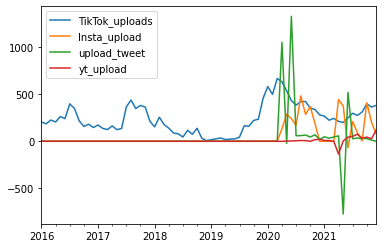

In [1323]:
result_1.plot()

In [1324]:
result_1 = result_1.reset_index()

In [1325]:
result_2 = result_1[result_1['index'].between('2020', '2022')]
result_2 =result_2.set_index('index')

<AxesSubplot:xlabel='index'>

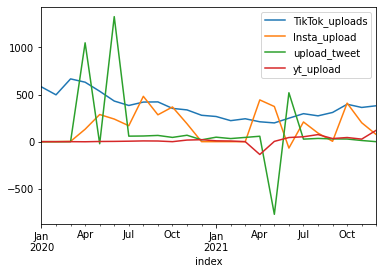

In [1326]:
result_2.plot()

In [1327]:
results = Test[['Month','Control','TikTok']]
results = results.set_index('Month')

In [1328]:
results

,Control,TikTok
Month,,
2016-01,3.50,4.750000
2016-02,4.75,4.750000
2016-03,7.25,5.750000
2016-04,9.75,5.916667
2016-05,7.50,10.000000
...,...,...
2021-08,24.75,20.625000
2021-09,21.25,17.625000
2021-10,19.00,14.625000


In [1329]:
results=results.reset_index()

In [1330]:
results.columns = results.columns.str.replace('Month', 'Date')
results.set_index('Date')

,Control,TikTok
Date,,
2016-01,3.50,4.750000
2016-02,4.75,4.750000
2016-03,7.25,5.750000
2016-04,9.75,5.916667
2016-05,7.50,10.000000
...,...,...
2021-08,24.75,20.625000
2021-09,21.25,17.625000
2021-10,19.00,14.625000


In [1331]:
results

,Date,Control,TikTok
0,2016-01,3.50,4.750000
1,2016-02,4.75,4.750000
2,2016-03,7.25,5.750000
3,2016-04,9.75,5.916667
4,2016-05,7.50,10.000000
...,...,...,...
67,2021-08,24.75,20.625000
68,2021-09,21.25,17.625000
69,2021-10,19.00,14.625000
70,2021-11,18.75,15.875000


In [1332]:
result_3

,TikTok_uploads,Insta_upload,upload_tweet,yt_upload
2016-01,205,0.0,0.00,0.0
2016-02,185,0.0,0.00,0.0
2016-03,225,0.0,0.00,0.0
2016-04,205,0.0,0.00,0.0
2016-05,262,0.0,0.00,0.0
...,...,...,...,...
2021-08,274,91.0,34.33,75.0
2021-09,310,4.0,29.33,33.0
2021-10,397,409.0,28.10,44.0
2021-11,363,201.0,12.40,27.0


In [1333]:
result_3 = result_3.reindex(pd.period_range(result_3.index[0],result_3.index[-1],freq='M'))
result_3=result_3.fillna(0.0)

In [1334]:
results=results.set_index('Date')

In [1335]:
results

,Control,TikTok
Date,,
2016-01,3.50,4.750000
2016-02,4.75,4.750000
2016-03,7.25,5.750000
2016-04,9.75,5.916667
2016-05,7.50,10.000000
...,...,...
2021-08,24.75,20.625000
2021-09,21.25,17.625000
2021-10,19.00,14.625000


In [1336]:
result_3=result_3.reset_index()
results=results.reset_index()
# result_3.columns = result_3.columns.str.replace('index', 'Date')
# result_3=result_3.set_index('Date')

In [1337]:
df = pd.read_csv('fixed.csv')
df2 = pd.read_csv('fixed.csv')

In [1338]:
df.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

,Unnamed: 0,Control,TikTok,TikTok_uploads,Insta_upload,upload_tweet,yt_upload
0,2016-01,3.500000,4.750000,205,0,0.000000,0
1,2016-02,4.750000,4.750000,185,0,0.000000,0
2,2016-03,7.250000,5.750000,225,0,0.000000,0
3,2016-04,9.750000,5.916667,205,0,0.000000,0
4,2016-05,7.500000,10.000000,262,0,0.000000,0
5,2016-06,4.750000,9.000000,240,0,0.000000,0
6,2016-07,11.500000,13.125000,397,0,0.000000,0
7,2016-08,11.750000,10.083333,348,0,0.000000,0
8,2016-09,7.250000,8.000000,217,0,0.000000,0
9,2016-10,8.250000,9.375000,157,0,0.000000,0


In [1339]:
df = df.drop('Control',axis=1)

In [1340]:
df = df.drop('Unnamed: 0',axis=1)

In [1341]:
def display_correlation(dfp):
    r = dfp.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(dfp.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [1342]:
dfv = df6['Views']
dft = df3['TikTok']
e = [dft,dfv]
dfvt = pd.concat(e,axis=1)

KeyError: 'TikTok'

In [ ]:
dfvt

NameError: name 'dfvt' is not defined

In [ ]:
r_simple=display_correlation(dfvt)

NameError: name 'dfvt' is not defined

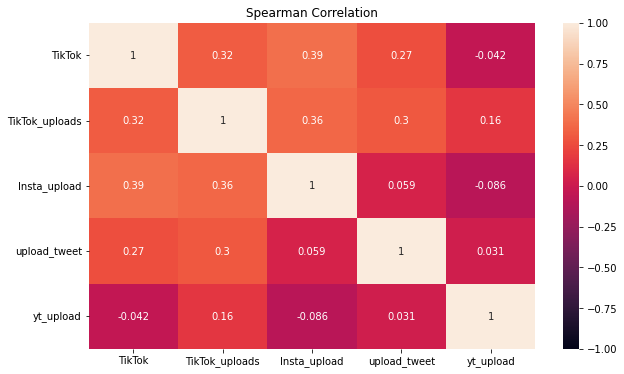

In [ ]:
r_simple=display_correlation(df)

In [ ]:
df.corr()

,TikTok,TikTok_uploads,Insta_upload,upload_tweet,yt_upload
TikTok,1.000000,0.316903,0.394208,0.265133,-0.042009
TikTok_uploads,0.316903,1.000000,0.362352,0.298326,0.162508
Insta_upload,0.394208,0.362352,1.000000,0.058570,-0.085995
upload_tweet,0.265133,0.298326,0.058570,1.000000,0.030613
yt_upload,-0.042009,0.162508,-0.085995,0.030613,1.000000


In [ ]:
dfvt.corr(method='spearman')


NameError: name 'dfvt' is not defined

In [ ]:
df.corr(method="spearman")

,TikTok,TikTok_uploads,Insta_upload,upload_tweet,yt_upload
TikTok,1.000000,0.310644,0.360360,0.413545,0.209338
TikTok_uploads,0.310644,1.000000,0.485373,0.390540,0.364579
Insta_upload,0.360360,0.485373,1.000000,0.465973,0.466632
upload_tweet,0.413545,0.390540,0.465973,1.000000,0.471460
yt_upload,0.209338,0.364579,0.466632,0.471460,1.000000


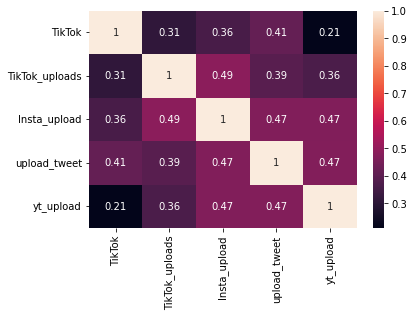

In [ ]:
speardf = df.corr(method="spearman")
sn.heatmap(speardf, annot=True)
plt.show()

In [1343]:
df3 = df[['TikTok','TikTok_uploads']]

In [1369]:
new = Test2.copy()

In [1371]:
new['Tiktok_uploads'] = df3['TikTok_uploads'].copy()

In [1372]:
new

,Month,TikTok,Views,Tiktok_uploads
0,2016-01,4.750000,1822612.0,205
1,2016-02,4.750000,2066889.0,185
2,2016-03,5.750000,2002328.0,225
3,2016-04,5.916667,2484429.0,205
4,2016-05,10.000000,210193520.0,262
...,...,...,...,...
67,2021-08,20.625000,252426165.0,274
68,2021-09,17.625000,224516647.0,310
69,2021-10,14.625000,415906882.0,397
70,2021-11,15.875000,197879102.0,363


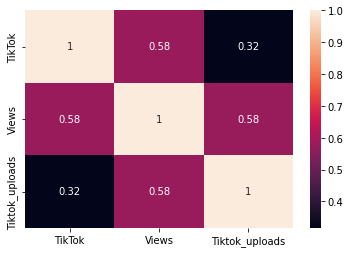

In [1373]:
import seaborn as sn
corrMatrix = new.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

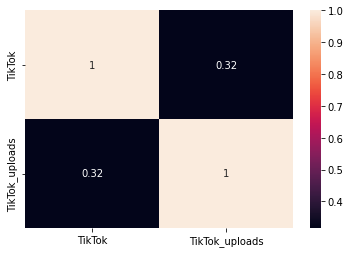

In [1345]:
import seaborn as sn
corrMatrix = df3.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

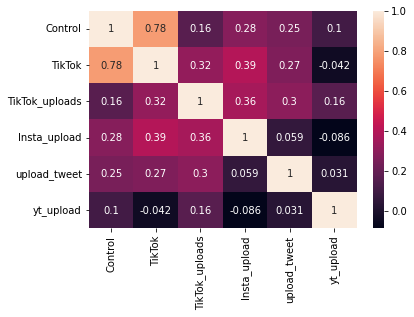

In [ ]:
import seaborn as sn
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

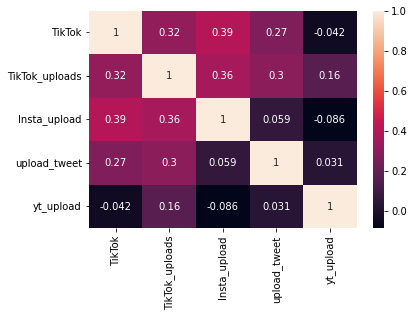

In [ ]:
import seaborn as sn
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

# Online LSTM 3

In [1472]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
numpy.random.seed(7)

In [1473]:
df=pd.read_csv('test2.csv',usecols=[1,2], engine='python')

In [1474]:
Test = df

In [1475]:
of_test = Test[['Month']]
a = Test[['TikTok_sum']]
of_test.insert(1, "TikTok_sum", ext)

KeyError: "None of [Index(['Month'], dtype='object')] are in the [columns]"

In [ ]:
of_test = of_test.fillna(0)

In [ ]:
of_test.to_csv('work.csv')

In [ ]:
dataframe = pandas.read_csv('work.csv', usecols=[2], engine='python')


In [ ]:
dataset = dataframe.values

In [ ]:
dataset = dataset.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(1, 2))
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

48 24


In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=120, batch_size=1, verbose=2)

Epoch 1/30
46/46 - 1s - loss: 2.0561 - 1s/epoch - 27ms/step
Epoch 2/30
46/46 - 0s - loss: 1.7464 - 52ms/epoch - 1ms/step
Epoch 3/30
46/46 - 0s - loss: 1.4625 - 47ms/epoch - 1ms/step
Epoch 4/30
46/46 - 0s - loss: 1.1658 - 48ms/epoch - 1ms/step
Epoch 5/30
46/46 - 0s - loss: 0.8546 - 47ms/epoch - 1ms/step
Epoch 6/30
46/46 - 0s - loss: 0.5603 - 45ms/epoch - 978us/step
Epoch 7/30
46/46 - 0s - loss: 0.3302 - 50ms/epoch - 1ms/step
Epoch 8/30
46/46 - 0s - loss: 0.1771 - 45ms/epoch - 989us/step
Epoch 9/30
46/46 - 0s - loss: 0.0961 - 45ms/epoch - 984us/step
Epoch 10/30
46/46 - 0s - loss: 0.0601 - 45ms/epoch - 971us/step
Epoch 11/30
46/46 - 0s - loss: 0.0448 - 45ms/epoch - 985us/step
Epoch 12/30
46/46 - 0s - loss: 0.0399 - 49ms/epoch - 1ms/step
Epoch 13/30
46/46 - 0s - loss: 0.0381 - 43ms/epoch - 931us/step
Epoch 14/30
46/46 - 0s - loss: 0.0380 - 44ms/epoch - 958us/step
Epoch 15/30
46/46 - 0s - loss: 0.0376 - 43ms/epoch - 942us/step
Epoch 16/30
46/46 - 0s - loss: 0.0375 - 43ms/epoch - 931us/step


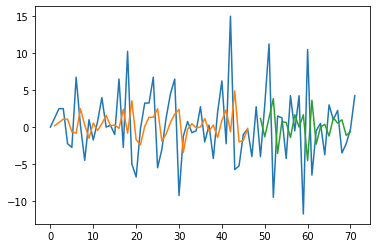

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# GRU

https://towardsdatascience.com/predictive-analytics-time-series-forecasting-with-gru-and-bilstm-in-tensorflow-87588c852915

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [ ]:
tf.random.set_seed(1234)

In [ ]:
df = pd.read_csv('test2.csv')

In [ ]:
import pandas as pd
df["Month"] = pd.to_datetime(df["Month"],format='%Y-%m')

In [ ]:
df

,Month,TikTok_sum
0,2016-01-01,4.750000
1,2016-02-01,9.500000
2,2016-03-01,15.250000
3,2016-04-01,21.166667
4,2016-05-01,31.166667
...,...,...
67,2021-08-01,1396.708333
68,2021-09-01,1414.333333
69,2021-10-01,1428.958333
70,2021-11-01,1444.833333


In [ ]:
 df['Year']=df.groupby(pd.Grouper(freq='Y'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
df

,Month,TikTok_sum
Month,,
2016-01-01,2016-01-01,4.750000
2016-02-01,2016-02-01,9.500000
2016-03-01,2016-03-01,15.250000
2016-04-01,2016-04-01,21.166667
2016-05-01,2016-05-01,31.166667
...,...,...
2021-08-01,2021-08-01,1396.708333
2021-09-01,2021-09-01,1414.333333
2021-10-01,2021-10-01,1428.958333


AttributeError: 'Int64Index' object has no attribute 'year'

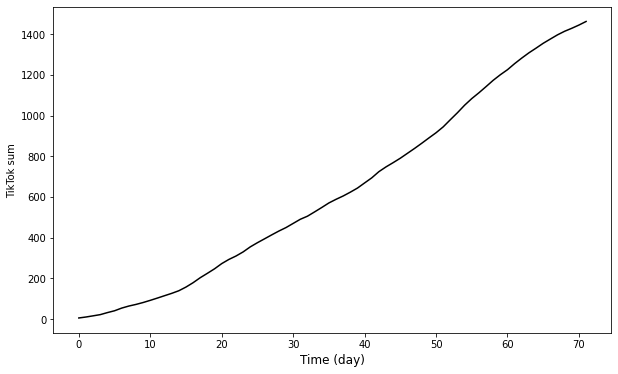

In [ ]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('TikTok sum')
dataset = df.copy()
timeseries(df.index, dataset['TikTok_sum'], 'Time (month)')

dataset['year'] = dataset.index.year
dataset_by_year = dataset.resample('Y').sum()
timeseries(dataset_by_year.index, dataset_by_year['TikTok_sum'], 
           'Time (month)')



In [ ]:
# Check for missing values
print('Total num of missing values:') 
print(df.TikTok_sum.isna().sum())
print('')
# Locate the missing value
df_missing_date = df.loc[df.TikTok_sum.isna() == True]
print('The date of missing value:')
print(df_missing_date.loc[:,['Month']])
# Replcase missing value with interpolation
df.TikTok_sum.interpolate(inplace = True)
# Keep WC and drop Date
df = df.drop('Month', axis = 1)

Total num of missing values:
0

The date of missing value:
Empty DataFrame
Columns: [Month]
Index: []


In [ ]:
train_size = int(len(df)*0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [ ]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [ ]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 10
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (47, 10, 1)
y_train.shape:  (47, 1)
X_test.shape:  (5, 10, 1)
y_test.shape:  (5, 1)


In [ ]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_bilstm = create_bilstm(64)
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [ ]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
3/3 [==============================] - 7s 617ms/step - loss: 0.1292 - val_loss: 0.3325
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0410 - val_loss: 0.0899
Epoch 3/100
3/3 [==============================] - 0s 42ms/step - loss: 0.0041 - val_loss: 0.0012
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0249 - val_loss: 0.0075
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0246 - val_loss: 7.6815e-04
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0135 - val_loss: 0.0068
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0067 - val_loss: 0.0230
Epoch 8/100
3/3 [==============================] - 0s 38ms/step - loss: 0.0047 - val_loss: 0.0333
Epoch 9/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0055 - val_loss: 0.0282
Epoch 10/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0028 - val_loss: 0.0169
Epoch 11/100
3

In [ ]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

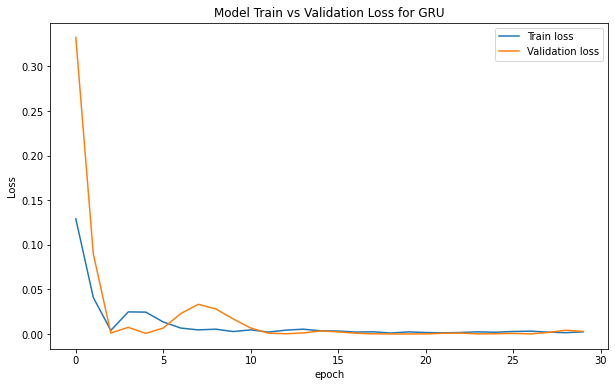

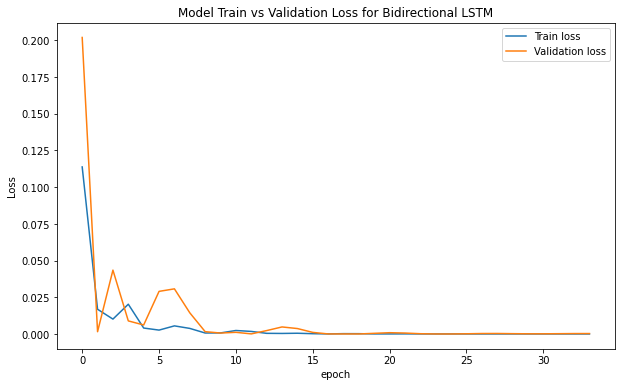

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

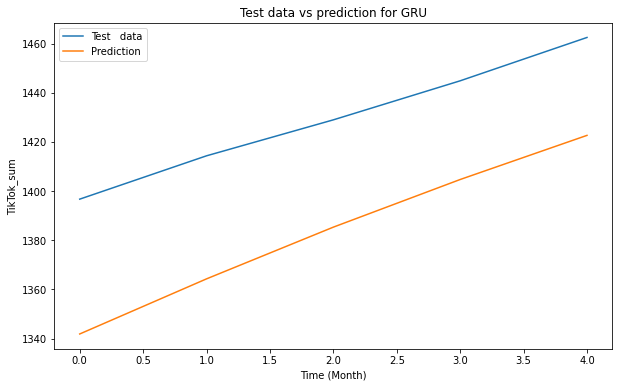

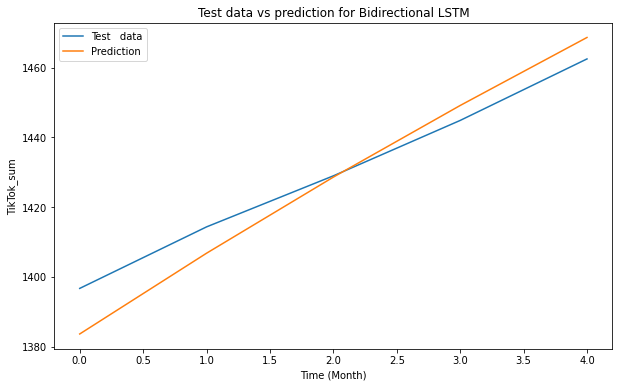

In [ ]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (Month)')
    plt.ylabel('TikTok_sum')
 
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

In [ ]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, y_test, 'GRU')
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectiona LSTM')

GRU:
Mean Absolute Error: 45.6921
Root Mean Square Error: 46.0671

Bidirectiona LSTM:
Mean Absolute Error: 6.2804
Root Mean Square Error: 7.5337

